In [4]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
# train 및 test 데이터 불러오기
df_train = pd.read_csv('data/open/train.csv')
df_test = pd.read_csv('data/open/test.csv')

In [8]:
# 데이터프레임 살펴보기
df_train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [9]:
df_train.shape

(96294, 15)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [12]:
# 결측치 수 확인
df_train.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [13]:
# 대출등급 훈련 데이터는 15개 컬럼, 96,294개 행으로 이루어져있음
# 수치형 데이터 : 대출금액, 연간소득, 부채_대비_소득_비율, 총계좌수, 최근_2년간_연체_횟수, 총연체금액, 연체계좌수
# 범주형 데이터 : ID, 대출기간, 근로기간, 주택소유상태, 대출목적, 대출등급
# isnull()로 확인한 결과 데이터 내 결측치 없음

In [14]:
# 수치형 데이터 통계값 확인
df_train.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


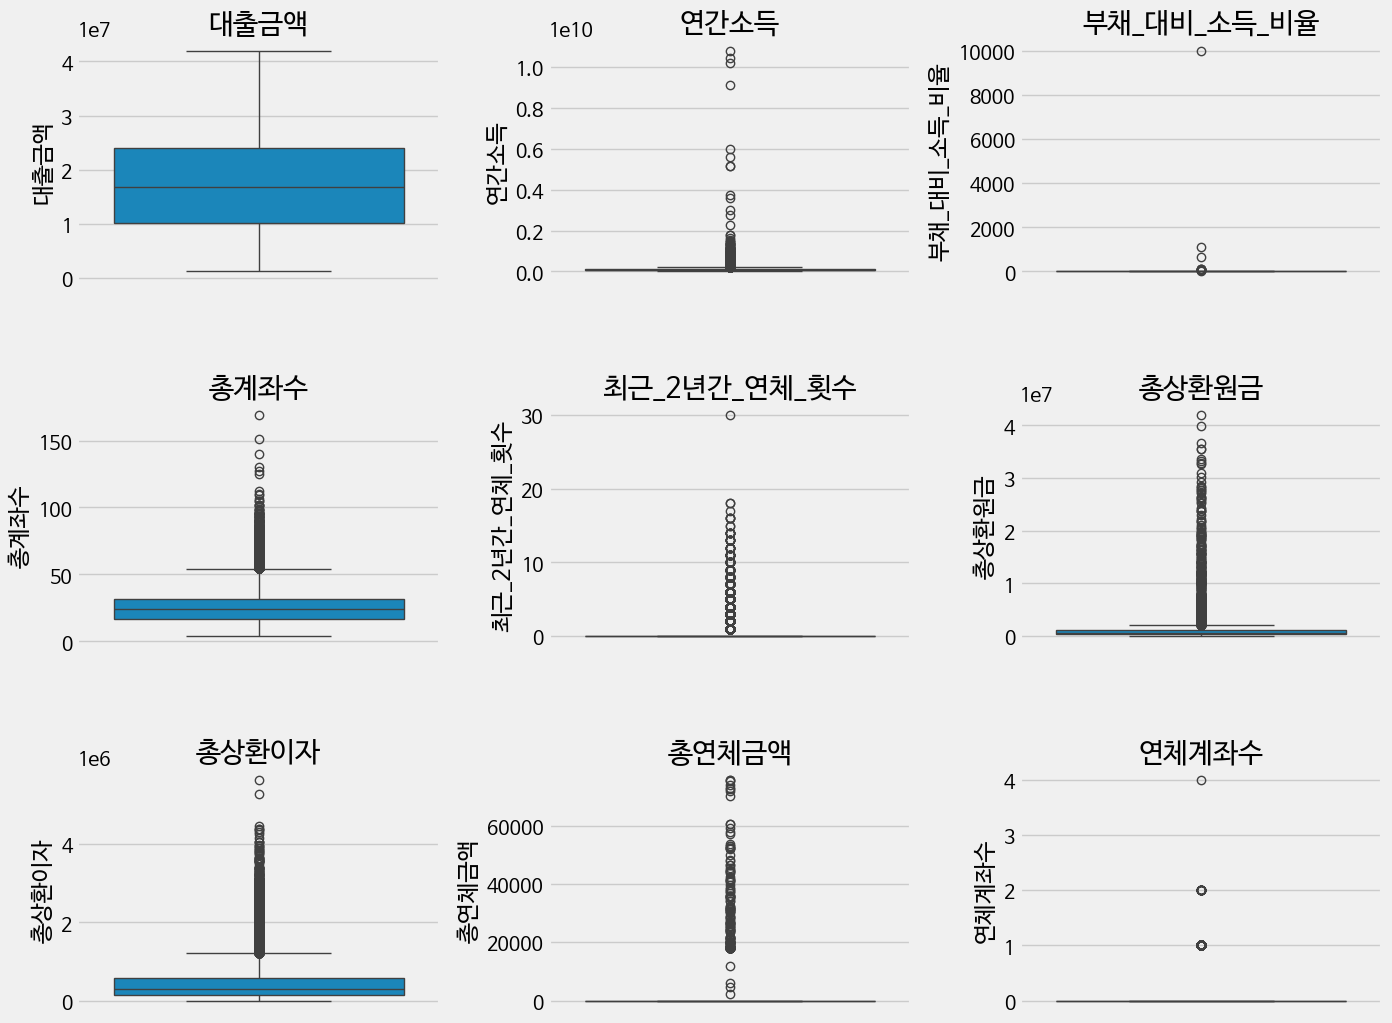

In [16]:
# 수치형 데이터 컬럼명 추출
num_cols = df_train.select_dtypes(include="number").columns

# 수치형 데이터 Boxplot
f, ax = plt.subplots(3,3,figsize=(15,12))

i = 0
for row in range(3):
  for col in range(3):
    sns.boxplot(df_train, y = num_cols[i], ax = ax[row,col])
    ax[row,col].set_title(num_cols[i])
    i += 1

plt.subplots_adjust(wspace = 0.3, hspace = 0.5)
plt.show()

In [17]:
# 대출금액을 제외한 모든 수치형 변수에서 이상치가 확인됨
# 일반적으로 이상치를 제거하는 것이 모델의 성능에 도움이 됨
# 근데 대출등급에 영향을 줄 수 있으므로, 각 feature에서의 경향을 확인한 후, 이상치 제거 여부를 결정함

In [19]:
# 범주형 데이터 컬럼명 추출

cat_cols = df_train.select_dtypes(include="object").columns
cat_cols

Index(['ID', '대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급'], dtype='object')

In [20]:
# 범주형 데이터 내 데이터 확인
for i in range(1,len(cat_cols)-1):  # ID와 대출등급 제외
    print(f'{cat_cols[i]}: {df_train[cat_cols[i]].unique()}')

대출기간: [' 36 months' ' 60 months']
근로기간: ['6 years' '10+ years' '5 years' '8 years' 'Unknown' '9 years' '2 years'
 '1 year' '3 years' '7 years' '4 years' '< 1 year' '10+years' '<1 year'
 '3' '1 years']
주택소유상태: ['RENT' 'MORTGAGE' 'OWN' 'ANY']
대출목적: ['부채 통합' '주택 개선' '주요 구매' '휴가' '의료' '자동차' '신용 카드' '소규모 사업' '기타' '이사' '주택'
 '재생 에너지']


In [21]:
# 근로기간 오탈자 수정
df_train['근로기간'] = df_train['근로기간'].replace('1 years', '1 year')
df_train['근로기간'] = df_train['근로기간'].replace('10+years', '10+ years')
df_train['근로기간'] = df_train['근로기간'].replace('3', '3 years')
df_train['근로기간'] = df_train['근로기간'].replace('<1 year', '< 1 year')

In [22]:
print(f"{'근로기간'}: {df_train['근로기간'].unique()}")

근로기간: ['6 years' '10+ years' '5 years' '8 years' 'Unknown' '9 years' '2 years'
 '1 year' '3 years' '7 years' '4 years' '< 1 year']


In [23]:
# 근로기간 feature의 오탈자는 모두 수정됨
# feature에 대한 전처리는 feature engineering 과정에서 진행

In [24]:
# 데이터프레임 살펴보기
df_test.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,TEST_00003,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,TEST_00004,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0


In [25]:
df_test.shape

(64197, 14)

In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64197 entries, 0 to 64196
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            64197 non-null  object 
 1   대출금액          64197 non-null  int64  
 2   대출기간          64197 non-null  object 
 3   근로기간          64197 non-null  object 
 4   주택소유상태        64197 non-null  object 
 5   연간소득          64197 non-null  int64  
 6   부채_대비_소득_비율   64197 non-null  float64
 7   총계좌수          64197 non-null  int64  
 8   대출목적          64197 non-null  object 
 9   최근_2년간_연체_횟수  64197 non-null  int64  
 10  총상환원금         64197 non-null  int64  
 11  총상환이자         64197 non-null  float64
 12  총연체금액         64197 non-null  float64
 13  연체계좌수         64197 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 6.9+ MB


In [27]:
# 결측치 수 확인
df_train.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [28]:
# 대출등급 훈련 데이터는 14개의 컬럼과 64,197개의 행으로 이루어진 데이터로 이루어져 있음
# 수치형 데이터: 대출금액, 연간소득, 부태_대비_소득_비율, 총계좌수, 최근_2년간_연체_횟수, 총상환원금, 총연제금액, 연쳬계좌수
# 범주형 데이터: ID, 대출기간, 근로기간, 주택소유상태, 대출목적
# 데이터 내 결측치 없음.

In [29]:
# 수치형 데이터 통계값 확인
df_test.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,6.419700e+04,6.419700e+04,64197.000000,64197.000000,64197.000000,6.419700e+04,6.419700e+04,64197.000000,64197.000000
mean,1.829630e+07,9.446378e+07,19.433747,25.295310,0.342882,8.231412e+05,4.324562e+05,50.313192,0.005499
std,1.038592e+07,1.117071e+08,40.375816,12.021127,0.901277,9.880161e+05,4.472797e+05,1396.384546,0.080020
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.008000e+07,5.759880e+07,12.630000,17.000000,0.000000,3.081840e+05,1.343520e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.770000,24.000000,0.000000,5.986800e+05,2.875680e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.560000,32.000000,0.000000,1.061508e+06,5.774160e+05,0.000000,0.000000
max,4.200000e+07,1.044790e+10,9999.000000,135.000000,15.000000,4.049760e+07,5.645688e+06,108240.000000,4.000000


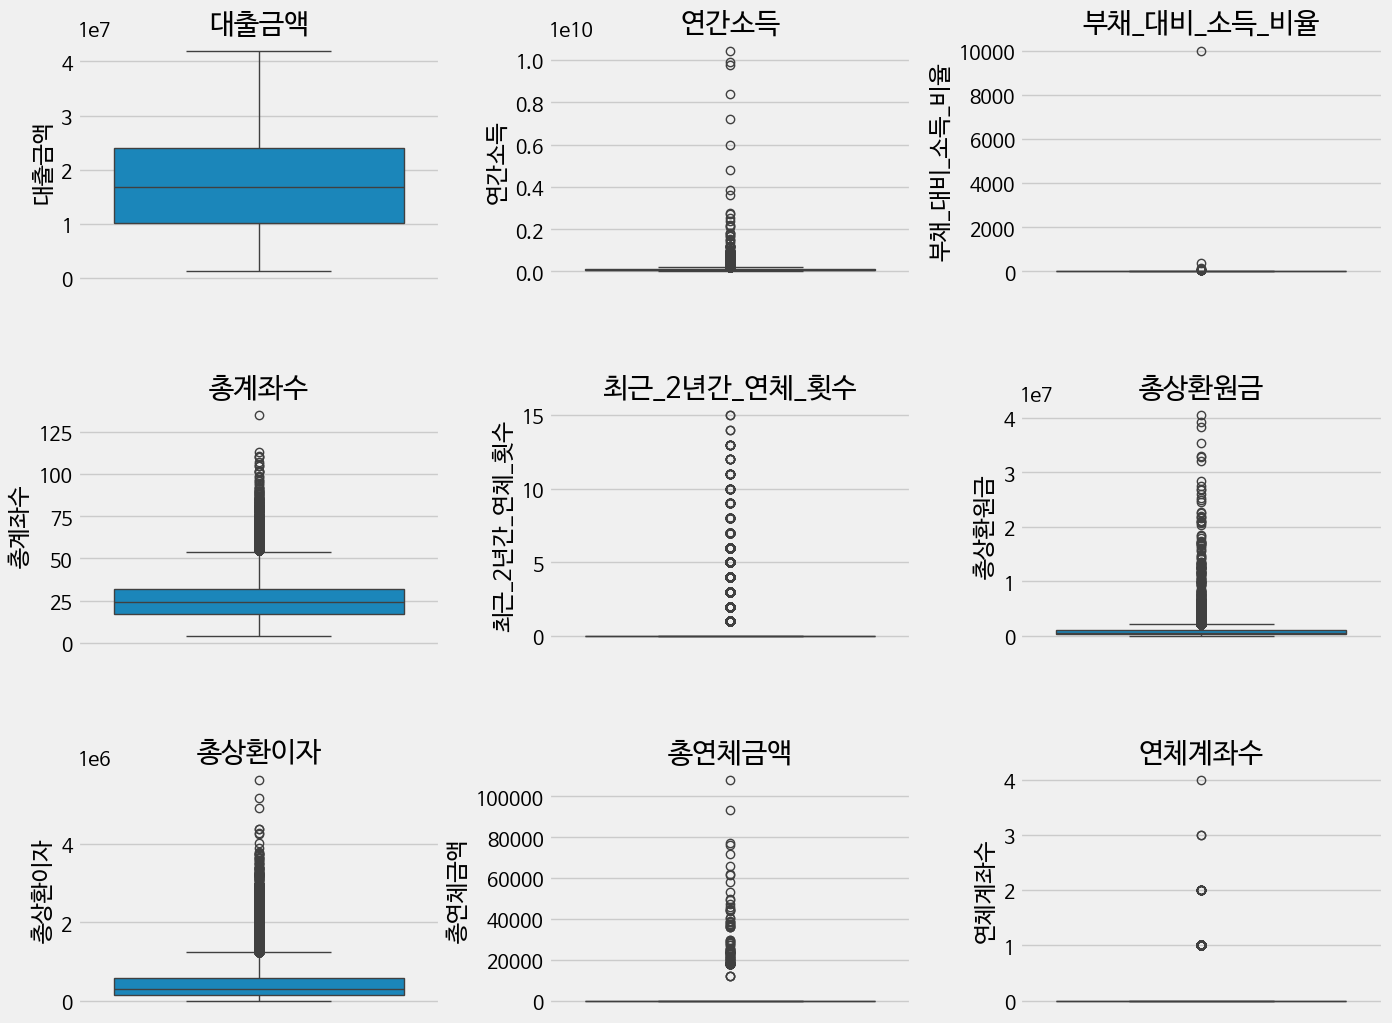

In [30]:
# 수치형 데이터 Boxplot
f, ax = plt.subplots(3,3, figsize = (15,12))

i = 0
for row in range(3):
    for col in range(3):
        sns.boxplot(df_test, y = num_cols[i], ax = ax[row, col])
        ax[row, col].set_title(num_cols[i])
        i += 1

plt.subplots_adjust(wspace = 0.3, hspace = 0.5)
plt.show()

In [31]:
# train 데이터와 마찬가지로 대출금액을 제외한 나머지 feature에서 이상치가 많이 확인됨
# 이러한 이상치들이 대출등급에 영향을 줄 수 있기 때문에 처리를 하지 않는 옵션도 고려해볼 필요가 있음

In [32]:
# 범주형 데이터 내 데이터 확인
for i in range(1,len(cat_cols)-1): # ID 제외
    print(f'{cat_cols[i]}: {df_test[cat_cols[i]].unique()}')

대출기간: [' 36 months' ' 60 months']
근로기간: ['8 years' '5 years' '6 years' 'Unknown' '10+ years' '3 years' '< 1 year'
 '1 year' '7 years' '4 years' '2 years' '9 years' '10+years' '<1 year' '3'
 '1 years']
주택소유상태: ['MORTGAGE' 'RENT' 'OWN']
대출목적: ['주택 개선' '부채 통합' '신용 카드' '기타' '주요 구매' '이사' '휴가' '소규모 사업' '주택' '의료' '자동차'
 '재생 에너지' '결혼']


In [33]:
# 근로기간 오탈자 수정
df_test['근로기간'] = df_test['근로기간'].replace('1 years', '1 year')
df_test['근로기간'] = df_test['근로기간'].replace('10+years', '10+ years')
df_test['근로기간'] = df_test['근로기간'].replace('3', '3 years')
df_test['근로기간'] = df_test['근로기간'].replace('<1 year', '< 1 year')

In [34]:
print(f"{'근로기간'}: {df_test['근로기간'].unique()}")

근로기간: ['8 years' '5 years' '6 years' 'Unknown' '10+ years' '3 years' '< 1 year'
 '1 year' '7 years' '4 years' '2 years' '9 years']


In [35]:
# 근로기간 feature의 오탈자는 모두 수정됨
# feature에 대한 전처리는 feature engineering 과정에서 진행

In [36]:
# 대출등급 범주 확인
sorted(df_train['대출등급'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [37]:
# 대출등급에 따른 고객수, 고객비율 확인
pd.concat([df_train.groupby('대출등급')['대출등급'].agg('count'), df_train.groupby('대출등급')['대출등급'].agg('count')/df_train.shape[0]], axis=1, keys = ['고객수','고객비율'])

,고객수,고객비율
대출등급,,
A,16772,0.174175
B,28817,0.299261
C,27623,0.286861
D,13354,0.138679
E,7354,0.076370
F,1954,0.020292
G,420,0.004362


Text(0.5, 1.0, 'PiePlot')

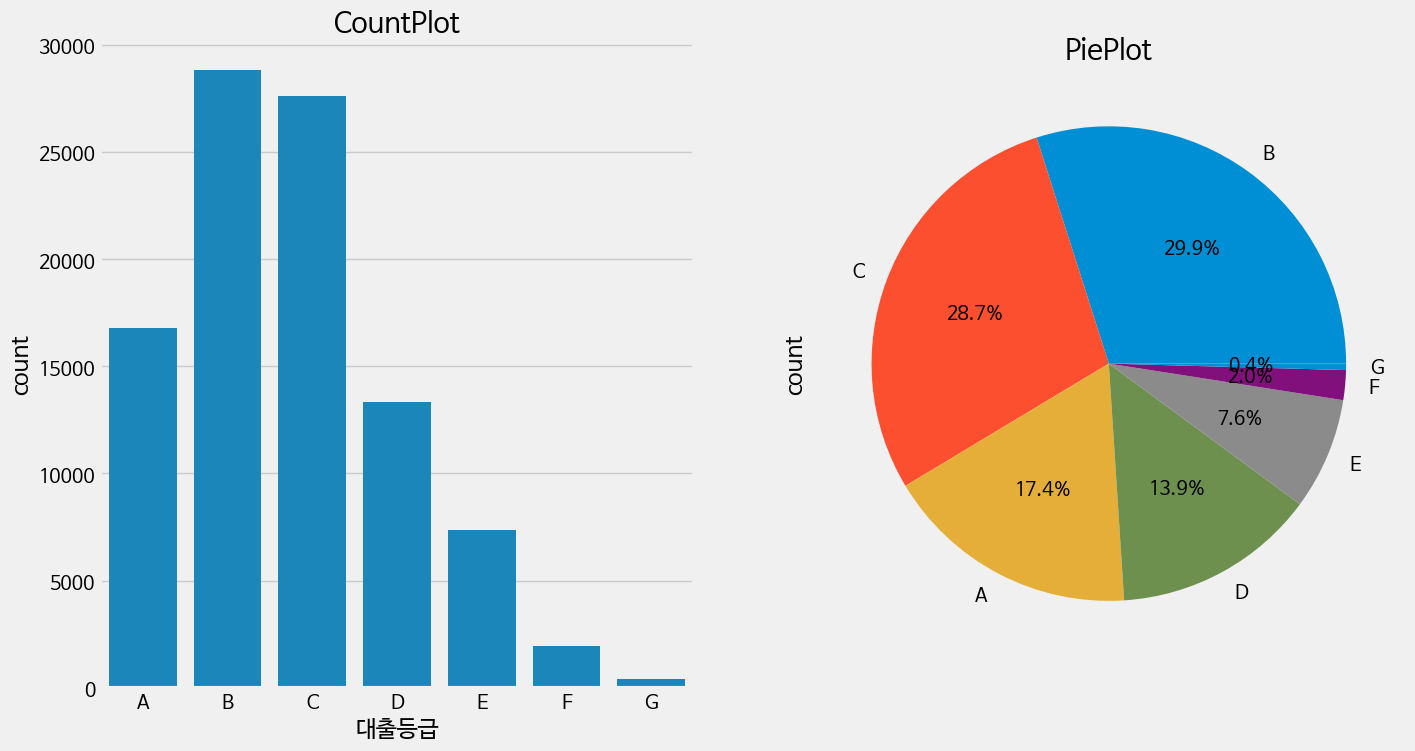

In [38]:
# 대출등급에 다른 고객수, 고객비율 plot
f, ax = plt.subplots(1,2, figsize = (15,8))
sns.countplot(x=sorted(df_train['대출등급']), data=df_train, ax = ax[0])
ax[0].set_title('CountPlot')
ax[0].set_xlabel('대출등급')
df_train['대출등급'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
ax[1].set_title('PiePlot')

In [39]:
# 대출등급은 A-G까지 총 7개의 등급으로 이루어져 있음
# C,B 등급의 고객수가 가장 많으며, A,D,E,F,G의 순으로 고객의 수가 감소함

In [40]:
# 대출등급과 대출기간에 따른 고객수
pd.crosstab(df_train['대출등급'],df_train['대출기간'], margins = True)

대출기간,36 months,60 months,All
대출등급,,,
A,15952,820,16772
B,22883,5934,28817
C,16935,10688,27623
D,6485,6869,13354
E,1895,5459,7354
F,270,1684,1954
G,59,361,420
All,64479,31815,96294


In [41]:
# 대출등급과 대출기간에 따른 고객비율
pd.crosstab(df_train['대출등급'],df_train['대출기간'], normalize='columns', margins = True)

대출기간,36 months,60 months,All
대출등급,,,
A,0.247398,0.025774,0.174175
B,0.354891,0.186516,0.299261
C,0.262644,0.335942,0.286861
D,0.100575,0.215904,0.138679
E,0.029389,0.171586,0.076370
F,0.004187,0.052931,0.020292
G,0.000915,0.011347,0.004362


Text(0.5, 0, '대출등급')

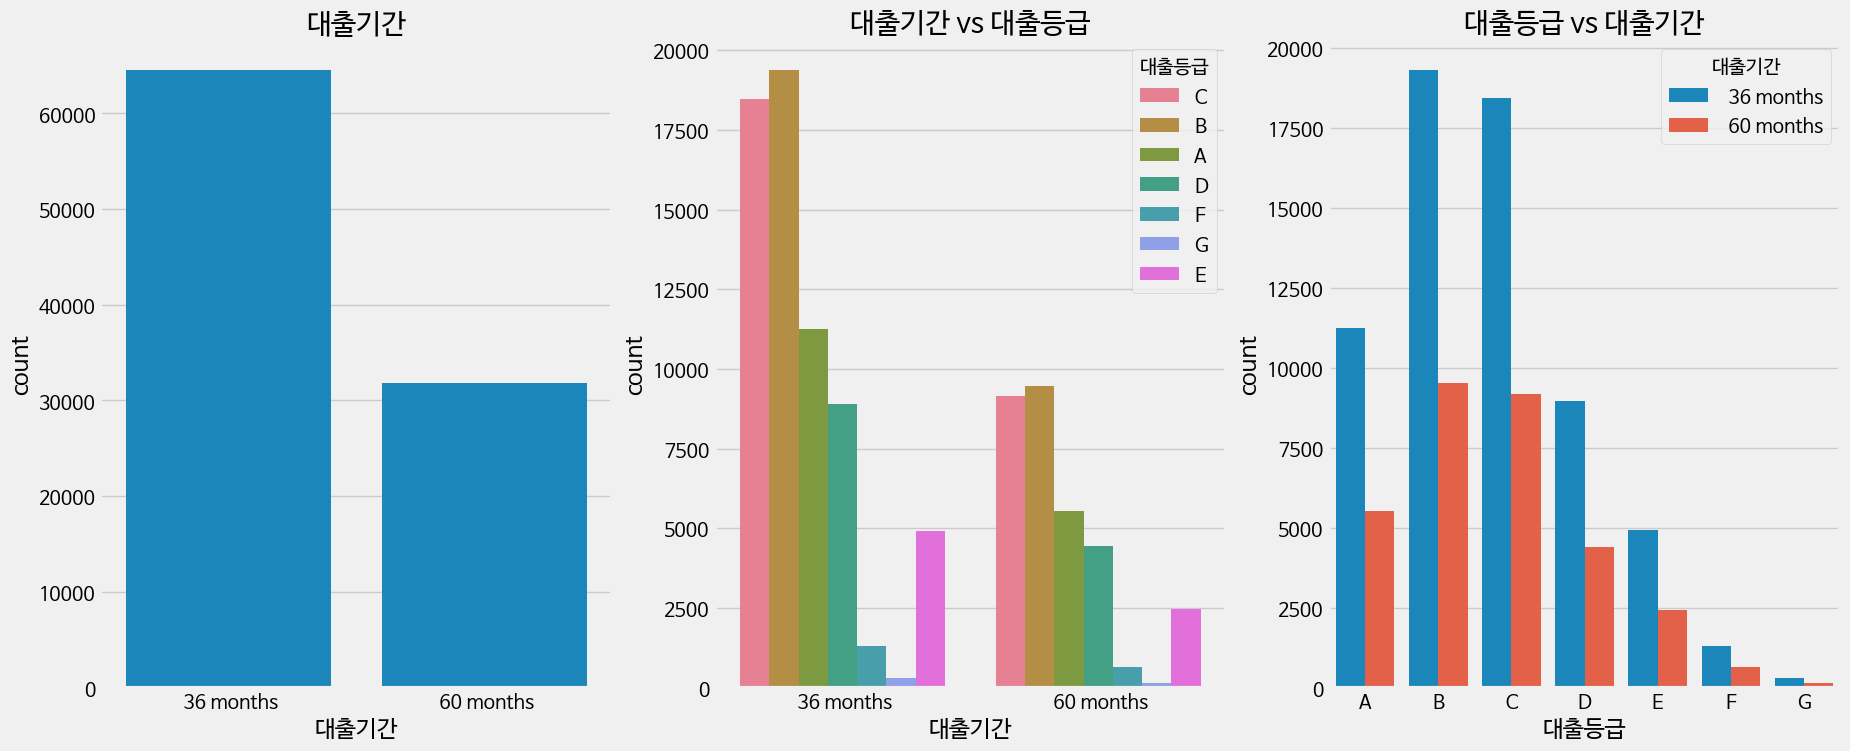

In [42]:
# 대출기간에 다른 고객수
f, ax = plt.subplots(1,3, figsize = (20,8))
sns.countplot(x=sorted(df_train['대출기간']), data=df_train, ax = ax[0])
ax[0].set_title('대출기간')
ax[0].set_xlabel('대출기간')
sns.countplot(x=sorted(df_train['대출기간']), hue = df_train['대출등급'], data=df_train, ax = ax[1])
ax[1].set_title('대출기간 vs 대출등급')
ax[1].set_xlabel('대출기간')
sns.countplot(x=sorted(df_train['대출등급']), hue = df_train['대출기간'], data=df_train, ax = ax[2])
ax[2].set_title('대출등급 vs 대출기간')
ax[2].set_xlabel('대출등급')

In [43]:
# 대출기간이 36개월인 고객수가 60개월인 고객수 대비 2배 가량 많음
# 대출기간에 따른 고객등급의 순위는 큰 차이가 없음
# 대출기간별 고객등급의 비율을 보면, B-E까지의 비율이 차이를 보임
# 대출기간은 대출등급을 결정하는 것에 좋은 feature가 될 것으로 보임

In [44]:
# 대출등급과 근로기간에 따른 고객수
pd.crosstab(df_train['대출등급'],df_train['근로기간'], margins = True)

근로기간,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,Unknown,All
대출등급,,,,,,,,,,,,,
A,1031,6009,1454,1315,969,986,650,619,867,621,1317,934,16772
B,1867,9865,2493,2302,1659,1679,1157,1138,1417,1137,2361,1742,28817
C,1860,9105,2495,2225,1577,1646,1124,1103,1364,1049,2447,1628,27623
D,927,4385,1107,1028,796,736,543,535,707,545,1173,872,13354
E,481,2331,695,608,440,475,296,318,385,289,658,378,7354
F,110,649,170,153,122,119,85,79,128,85,162,92,1954
G,29,137,36,39,25,24,19,22,20,18,26,25,420
All,6305,32481,8450,7670,5588,5665,3874,3814,4888,3744,8144,5671,96294


In [45]:
# 대출등급과 대출기간에 따른 고객비율
pd.crosstab(df_train['대출등급'],df_train['근로기간'], normalize='columns', margins = True)

근로기간,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,Unknown,All
대출등급,,,,,,,,,,,,,
A,0.163521,0.185000,0.172071,0.171447,0.173407,0.174051,0.167785,0.162297,0.177373,0.165865,0.161714,0.164698,0.174175
B,0.296114,0.303716,0.295030,0.300130,0.296886,0.296381,0.298658,0.298374,0.289894,0.303686,0.289907,0.307177,0.299261
C,0.295004,0.280318,0.295266,0.290091,0.282212,0.290556,0.290139,0.289198,0.279051,0.280182,0.300467,0.287075,0.286861
D,0.147026,0.135002,0.131006,0.134029,0.142448,0.129921,0.140165,0.140273,0.144640,0.145566,0.144032,0.153765,0.138679
E,0.076289,0.071765,0.082249,0.079270,0.078740,0.083848,0.076407,0.083377,0.078764,0.077190,0.080796,0.066655,0.076370
F,0.017446,0.019981,0.020118,0.019948,0.021832,0.021006,0.021941,0.020713,0.026187,0.022703,0.019892,0.016223,0.020292
G,0.004600,0.004218,0.004260,0.005085,0.004474,0.004237,0.004904,0.005768,0.004092,0.004808,0.003193,0.004408,0.004362


Text(0.5, 1.0, 'PiePlot')

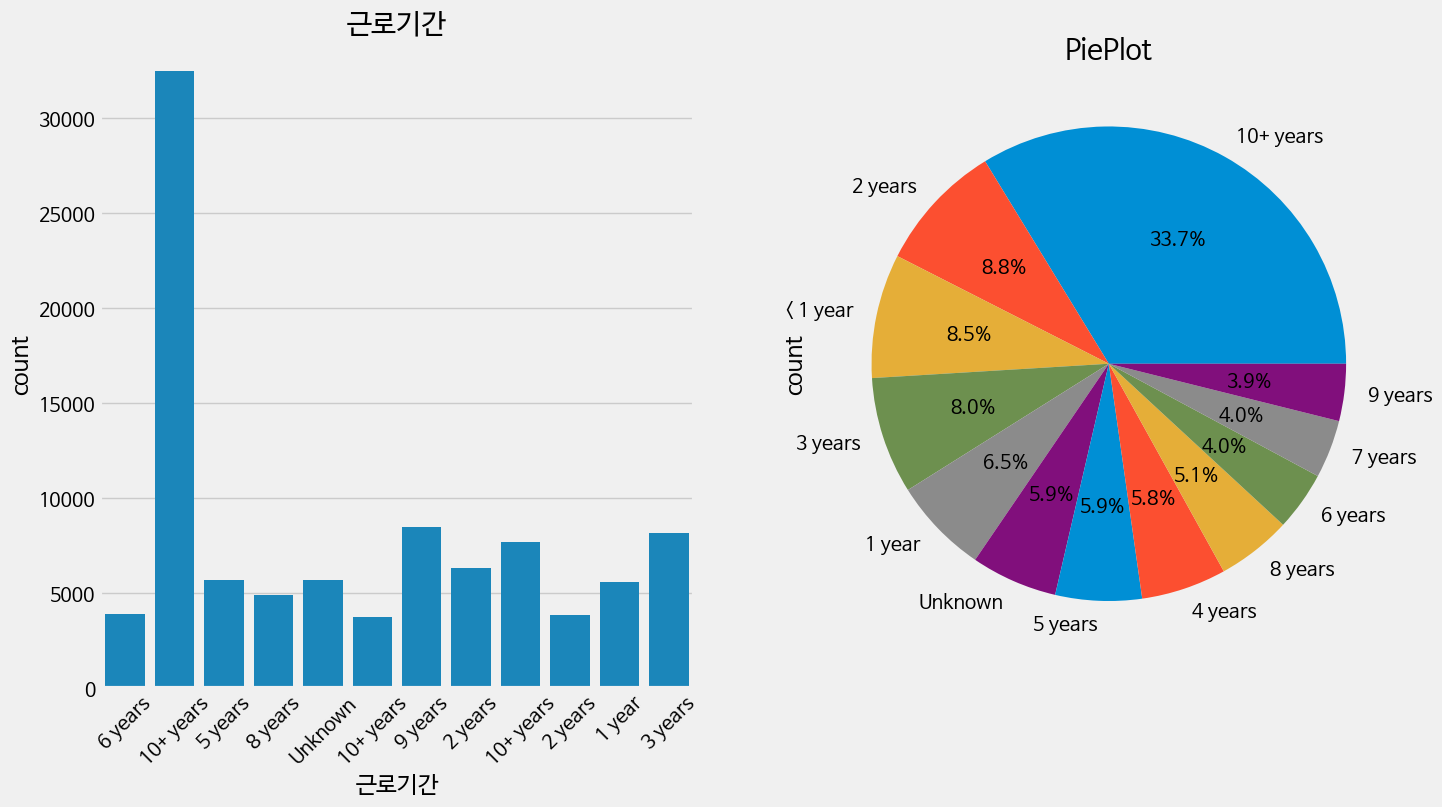

In [46]:
# 근로기간에 다른 고객수
f, ax = plt.subplots(1,2, figsize = (15,8))
sns.countplot(x='근로기간', data=df_train, ax = ax[0])
ax[0].set_title('근로기간')
ax[0].set_xlabel('근로기간')
ax[0].set_xticklabels(df_train['근로기간'],rotation=45)
df_train['근로기간'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
ax[1].set_title('PiePlot')

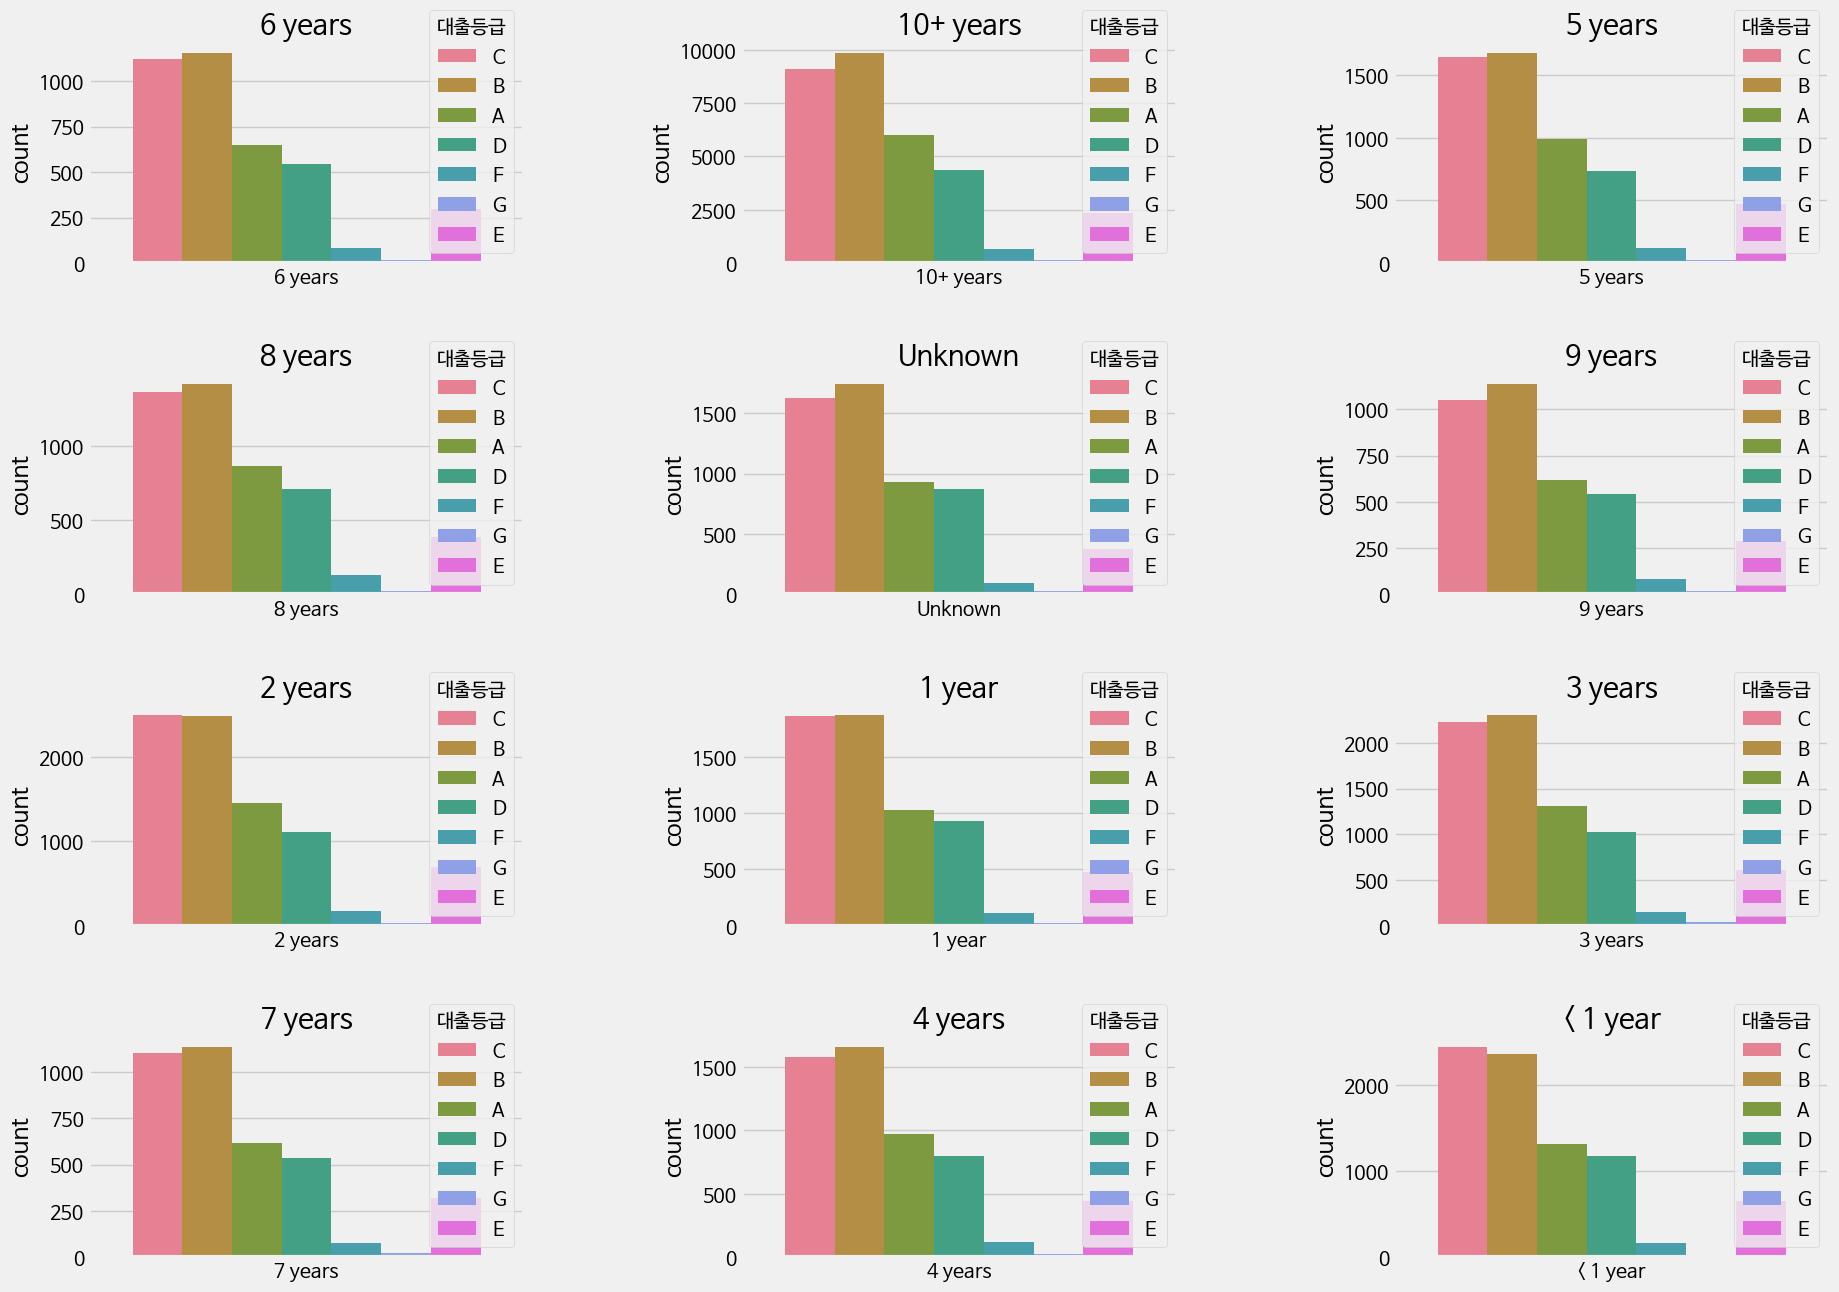

In [47]:
# 근로기간별 고객의 부채등급 확인
p_list = list(df_train['근로기간'].unique())

f, ax = plt.subplots(4,3, figsize = (20,15))

i = 0
for row in range(4):
    for col in range(3):
        sns.countplot(x = df_train[df_train['근로기간'] == p_list[i]]['근로기간'], hue = df_train['대출등급'], ax = ax[row, col])
        ax[row,col].set_title(p_list[i])
        ax[row,col].set_xlabel('')
        i += 1

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [48]:
# 근로기간에 따른 대출등급의 경향 중 1년과 2년차에는 C등급의 고객수가 많은 것을 제외하면,
# 전반적으로 대출등급의 비율은 유사한 수준임
# 근로기간이 Unknown인 경우가 5671건으로 많은 비중을 차지하고 있음
# 단순히 결측값으로 제외를 시키는 것은 모델 구성에 적절하지 않을 것으로 보임
# 시험 데이터에도 Unknown이 포함되어 있으므로 적절하게 변수를 처리하는 방법에 대한 고민이 필요함

In [49]:
# 대출등급과 주택소유상태에 따른 고객수
pd.crosstab(df_train['대출등급'],df_train['주택소유상태'], margins = True)

주택소유상태,ANY,MORTGAGE,OWN,RENT,All
대출등급,,,,,
A,0,9640,1864,5268,16772
B,0,14518,3099,11200,28817
C,1,13106,3038,11478,27623
D,0,6163,1538,5653,13354
E,0,3452,846,3056,7354
F,0,883,216,855,1954
G,0,172,53,195,420
All,1,47934,10654,37705,96294


In [50]:
# 대출등급과 주택소유상태에 따른 고객비율
pd.crosstab(df_train['대출등급'],df_train['주택소유상태'], normalize='columns', margins = True)

주택소유상태,ANY,MORTGAGE,OWN,RENT,All
대출등급,,,,,
A,0.0,0.201110,0.174958,0.139716,0.174175
B,0.0,0.302875,0.290877,0.297043,0.299261
C,1.0,0.273418,0.285151,0.304416,0.286861
D,0.0,0.128573,0.144359,0.149927,0.138679
E,0.0,0.072016,0.079407,0.081050,0.076370
F,0.0,0.018421,0.020274,0.022676,0.020292
G,0.0,0.003588,0.004975,0.005172,0.004362


Text(0.5, 0, '대출등급')

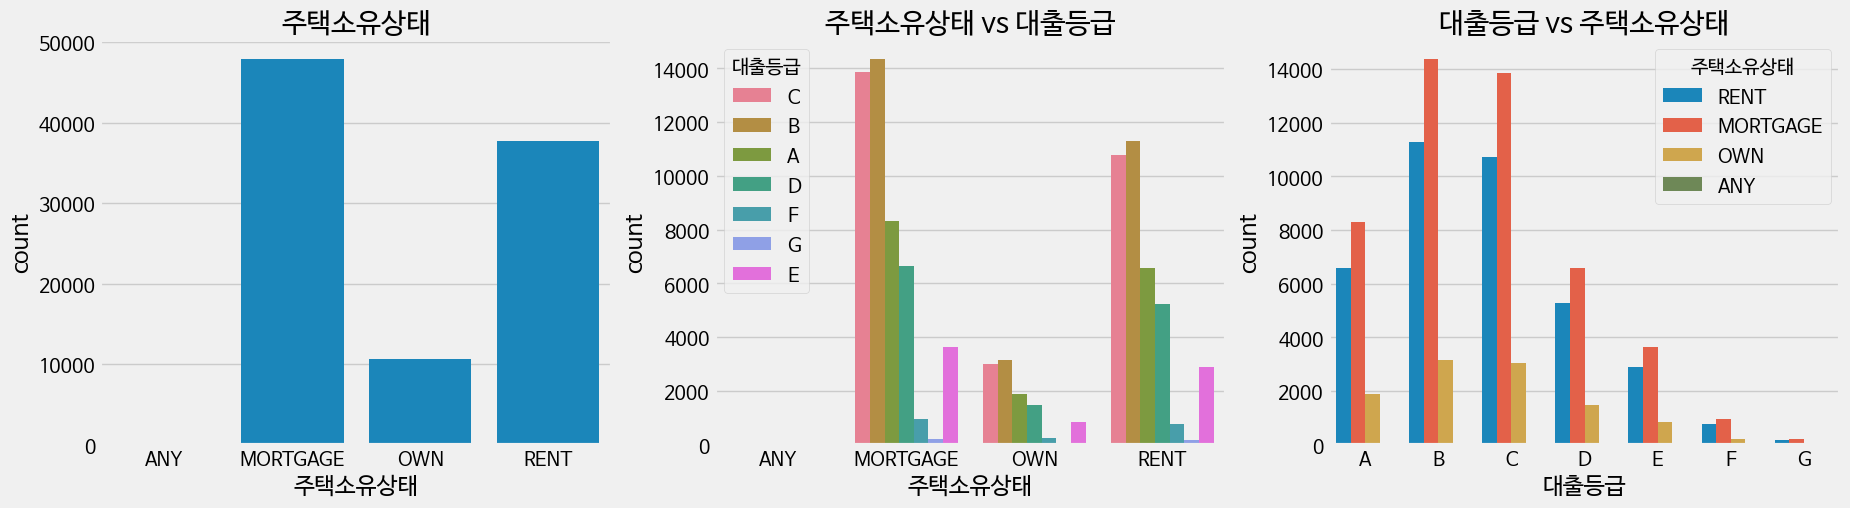

In [51]:
# 대출기간에 다른 고객수
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.countplot(x=sorted(df_train['주택소유상태']), data=df_train, ax = ax[0])
ax[0].set_title('주택소유상태')
ax[0].set_xlabel('주택소유상태')
sns.countplot(x=sorted(df_train['주택소유상태']), hue = df_train['대출등급'], data=df_train, ax = ax[1])
ax[1].set_title('주택소유상태 vs 대출등급')
ax[1].set_xlabel('주택소유상태')
sns.countplot(x=sorted(df_train['대출등급']), hue = df_train['주택소유상태'], data=df_train, ax = ax[2])
ax[2].set_title('대출등급 vs 주택소유상태')
ax[2].set_xlabel('대출등급')

In [52]:
# 주택소유상태 ANY는 1건이 있음
# ANY를 하나의 범주로 둘 수 있는데 이상치로 작용해서 모델의 성능 발현에 도움이 되지 않아보임
# feature engineering 과정에서 적절하게 처리해봐야함
# 주택소유상태에 따른 대출등급의 경향에서 C,B,A,D까지의 고객수 경향은 동일함
# E,F,G 고객수의 경향에서 차이를 보임
# 주택소유상태가 OWN인 경우에 F등급이 E등급에 비해 많음
# MORTGAGE나 RENT의 경우에는 E등급이 F등급에 비해 많음
# 주택소유상태가 상위 등급에는 큰 영향이 없음
# 하위 등급 특히 E, F의 등급 예측에는 좋은 feature가 될 수 있어보임
# 대출등급에 따른 주택소유상태는 유사한 경향으로 보임

In [53]:
df_train['대출목적'].unique()

array(['부채 통합', '주택 개선', '주요 구매', '휴가', '의료', '자동차', '신용 카드', '소규모 사업',
       '기타', '이사', '주택', '재생 에너지'], dtype=object)

In [54]:
# 대출등급과 대출목적에 따른 고객수
pd.crosstab(df_train['대출등급'],df_train['대출목적'], margins = True)

대출목적,기타,부채 통합,소규모 사업,신용 카드,의료,이사,자동차,재생 에너지,주요 구매,주택,주택 개선,휴가,All
대출등급,,,,,,,,,,,,,
A,356,8036,19,6424,104,13,174,1,372,8,1225,40,16772
B,1080,15680,75,8917,238,86,258,4,479,36,1845,119,28817
C,1705,16349,249,6036,375,203,213,20,503,85,1689,196,27623
D,916,8529,192,2092,197,131,87,21,238,68,805,78,13354
E,478,4979,158,877,91,50,46,10,150,63,425,27,7354
F,147,1311,64,137,27,18,15,4,53,29,145,4,1954
G,43,266,30,17,7,5,4,0,8,12,26,2,420
All,4725,55150,787,24500,1039,506,797,60,1803,301,6160,466,96294


In [56]:
# 대출등급과 대출목적에 따른 고객수 비율
pd.crosstab(df_train['대출등급'],df_train['대출목적'], normalize='columns',margins = True)

대출목적,기타,부채 통합,소규모 사업,신용 카드,의료,이사,자동차,재생 에너지,주요 구매,주택,주택 개선,휴가,All
대출등급,,,,,,,,,,,,,
A,0.075344,0.145712,0.024142,0.262204,0.100096,0.025692,0.218319,0.016667,0.206323,0.026578,0.198864,0.085837,0.174175
B,0.228571,0.284316,0.095299,0.363959,0.229066,0.169960,0.323714,0.066667,0.265668,0.119601,0.299513,0.255365,0.299261
C,0.360847,0.296446,0.316391,0.246367,0.360924,0.401186,0.267252,0.333333,0.278979,0.282392,0.274188,0.420601,0.286861
D,0.193862,0.154651,0.243964,0.085388,0.189605,0.258893,0.109159,0.350000,0.132002,0.225914,0.130682,0.167382,0.138679
E,0.101164,0.090281,0.200762,0.035796,0.087584,0.098814,0.057716,0.166667,0.083195,0.209302,0.068994,0.057940,0.076370
F,0.031111,0.023772,0.081321,0.005592,0.025987,0.035573,0.018821,0.066667,0.029395,0.096346,0.023539,0.008584,0.020292
G,0.009101,0.004823,0.038119,0.000694,0.006737,0.009881,0.005019,0.000000,0.004437,0.039867,0.004221,0.004292,0.004362


Text(0.5, 0, '대출목적')

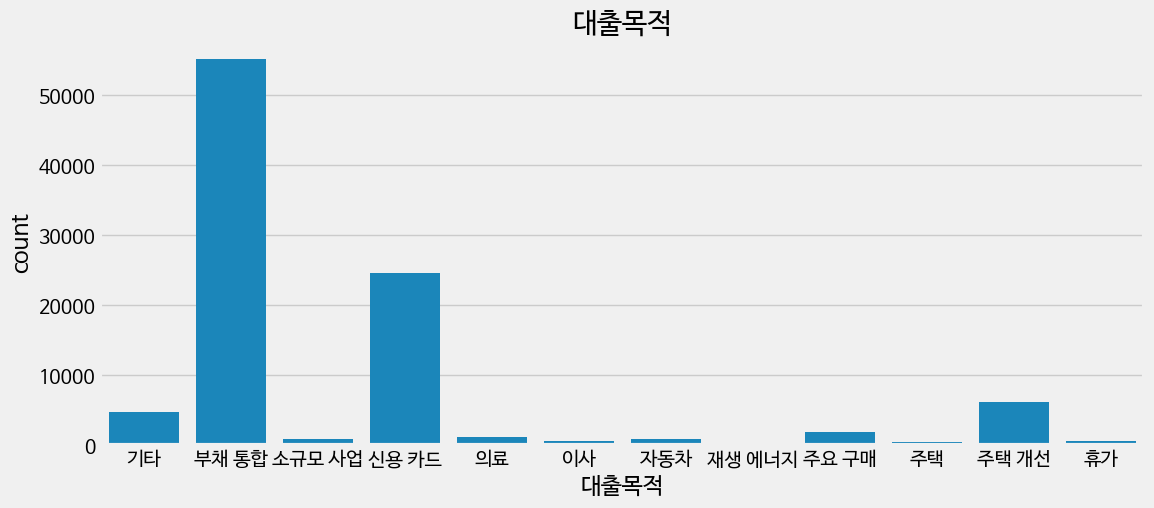

In [57]:
# 대출목적에 다른 고객수
f, ax = plt.subplots(1,1, figsize = (12,5))
sns.countplot(x=sorted(df_train['대출목적']), data=df_train, ax = ax)
ax.set_title('대출목적')
ax.set_xlabel('대출목적')

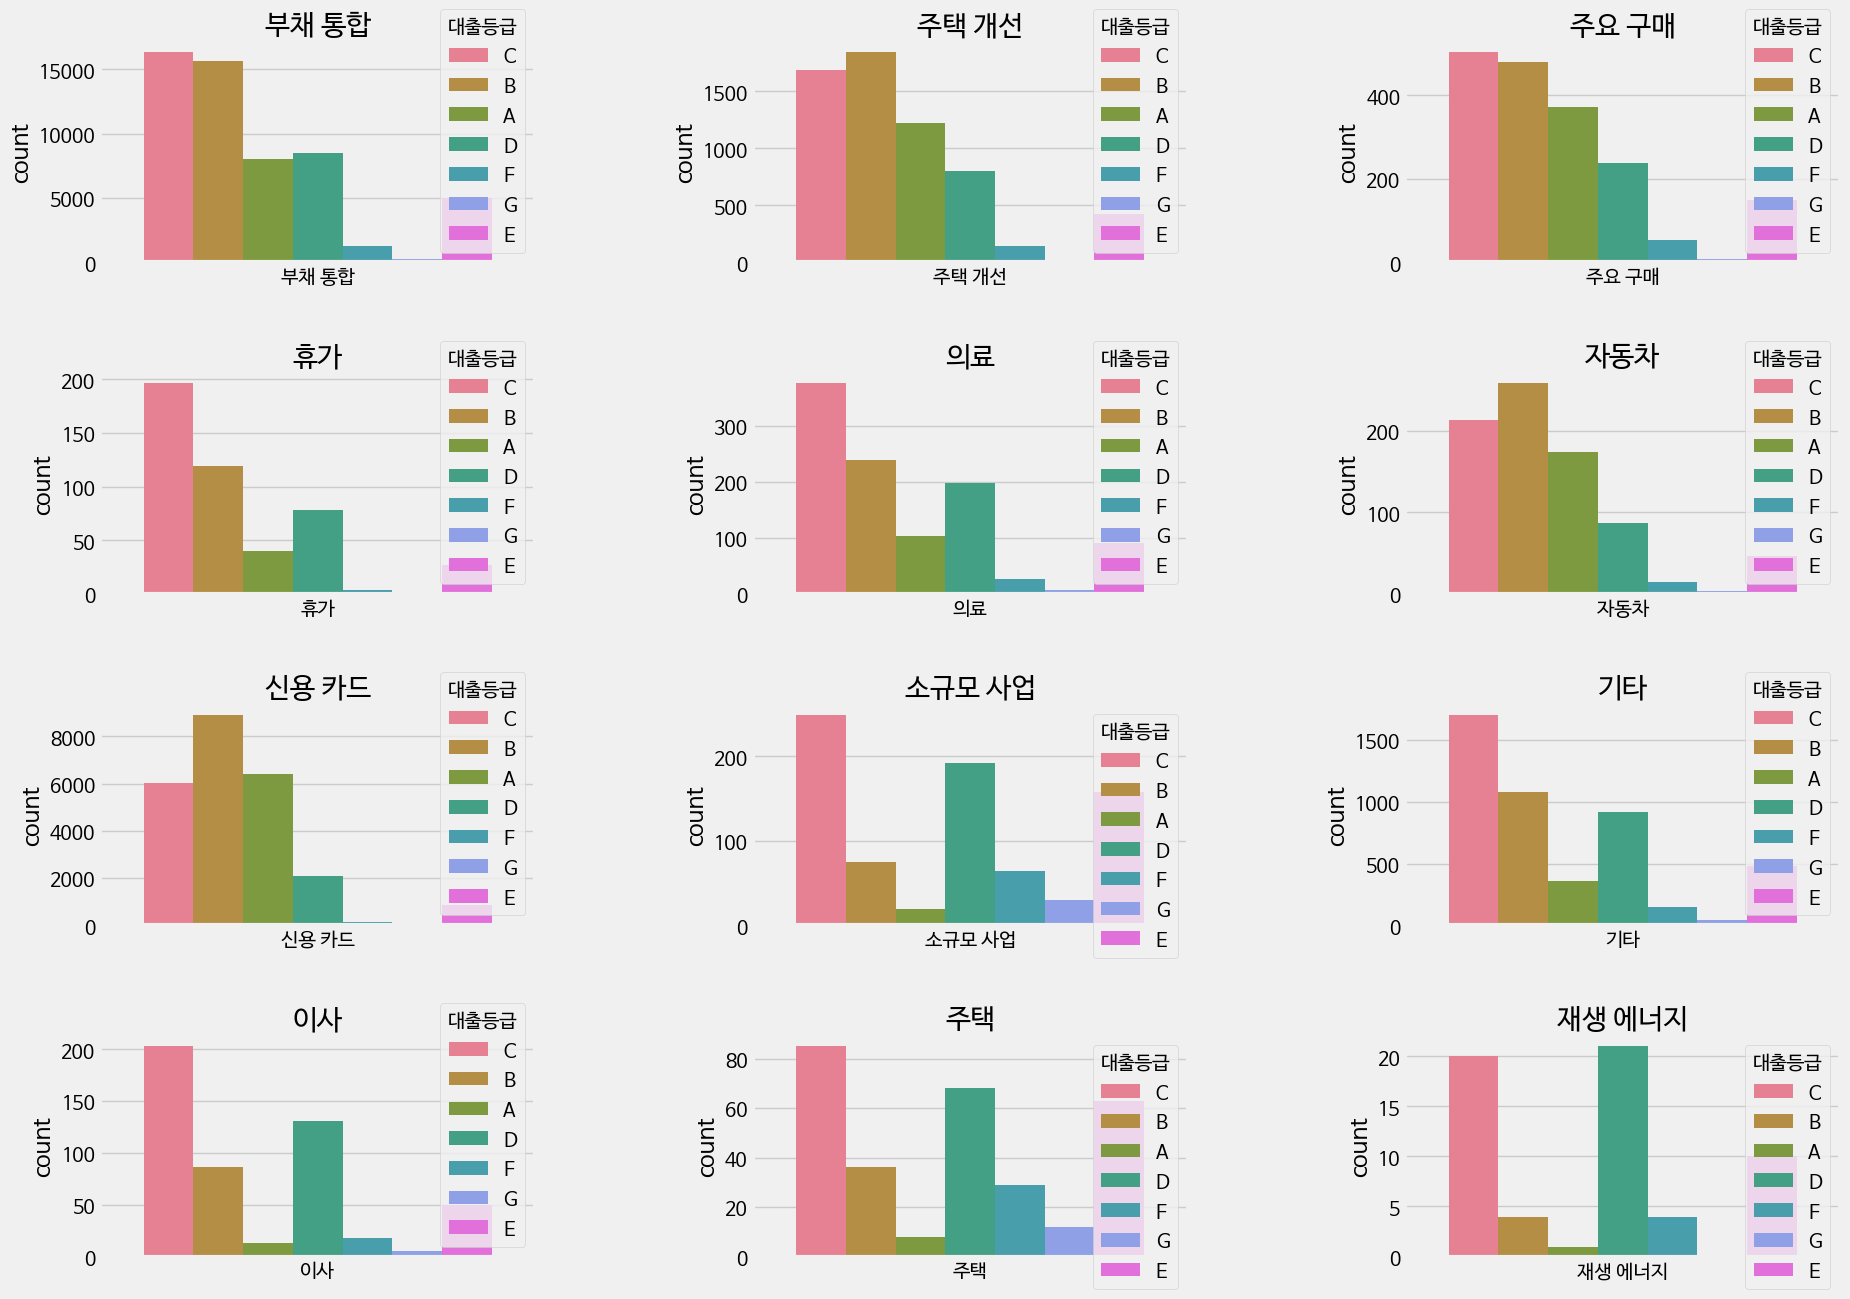

In [58]:
# 대출목적별 고객의 부채등급 확인
p_list = list(df_train['대출목적'].unique())

f, ax = plt.subplots(4,3, figsize = (20,15))

i = 0
for row in range(4):
    for col in range(3):
        sns.countplot(x = df_train[df_train['대출목적'] == p_list[i]]['대출목적'], hue = df_train['대출등급'], ax = ax[row, col])
        ax[row,col].set_title(p_list[i])
        ax[row,col].set_xlabel('')
        i += 1

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [59]:
# 대출목적 중 부채 통합이 가장 많음
# 신용카드, 주택 개선, 기타, 주요구매, 의료, 자동차, 사업, 이사, 주택, 재생에너지의 순으로 감소함
# 각 대출목적에 따라 대출등급의 분포가 다른 경향을 보이고 있음
# 대출목적은 대출등급에 영향을 줄 수 있는 feature로 보이지만, 너무 많은 항목들을 범주로 둘 경우 모델의 성능 저하에 영향을 줄 수 있을 것으로 생각됨
# train 데이터에 없는 신규 목적이 있는 경우 어떻게 어떤 방식으로 처리할지에 대한 고민이 필요해 보임

In [60]:
# 대출금액 통계치 확인
df_train['대출금액'].describe()

count    9.629400e+04
mean     1.830400e+07
std      1.032908e+07
min      1.200000e+06
25%      1.020000e+07
50%      1.680000e+07
75%      2.400000e+07
max      4.200000e+07
Name: 대출금액, dtype: float64

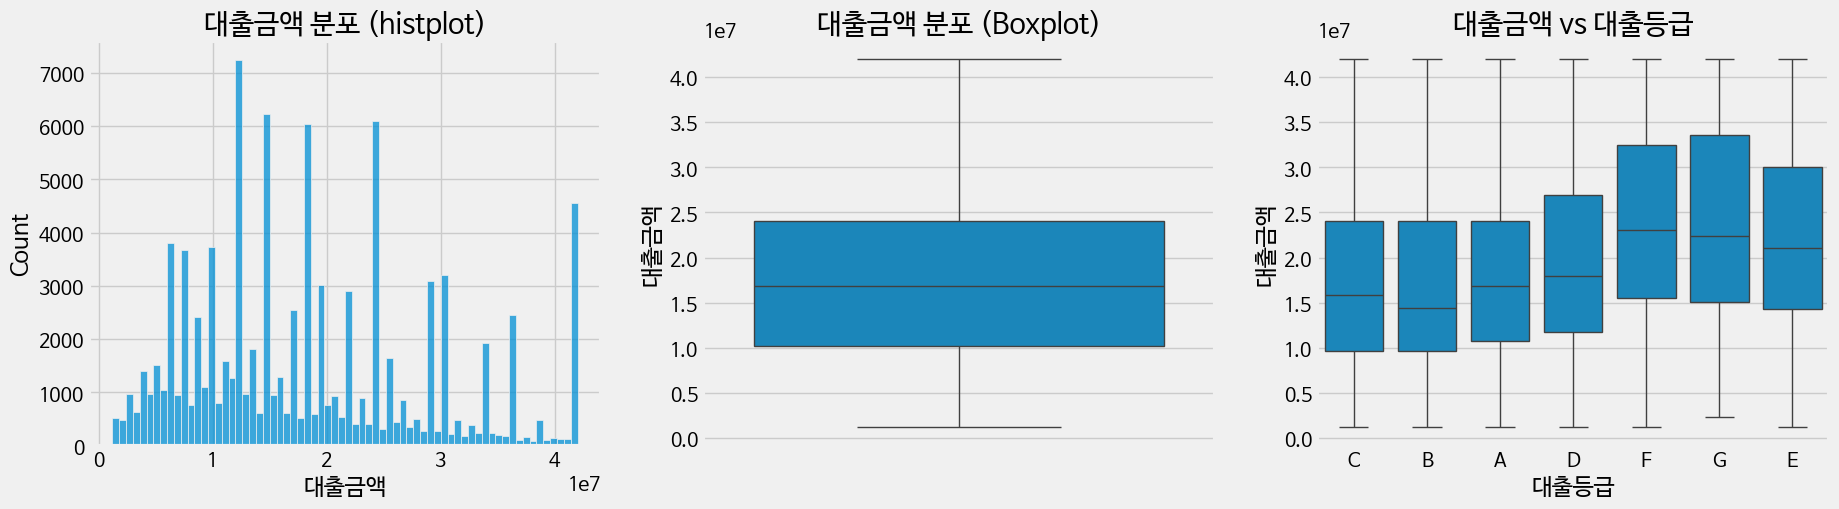

In [61]:
# 대출금액 plot
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df_train, x='대출금액',ax=ax[0])
ax[0].set_title('대출금액 분포 (histplot)')
sns.boxplot(y = df_train['대출금액'], ax=ax[1])
ax[1].set_title('대출금액 분포 (Boxplot)')
sns.boxplot(y =df_train['대출금액'], x = df_train['대출등급'], ax=ax[2])
ax[2].set_title('대출금액 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [62]:
# 대출등급에 따른 대출금액 평균값, 중앙값
df_train.groupby('대출등급')[['대출금액']].agg('mean','median')

,대출금액
대출등급,
A,1.790579e+07
B,1.686808e+07
C,1.789004e+07
D,1.953331e+07
E,2.232013e+07
F,2.400517e+07
G,2.402079e+07


In [63]:
# 대출금액의 분포는 이상치가 확인되지 않으며, 낮은 금액대에 상대적으로 많이 분포해 있음
# 대출등급에 따른 대출금액의 분포를 보면, 대출등급이 낮아질수록 대출금액의 분포나 평균값이 증가하는 경향임을 확인할 수 있음
# 대출금액과 대출등급은 음의 상관관계

In [64]:
# 연간소득 통계치 확인
df_train['연간소득'].describe()

count    9.629400e+04
mean     9.392672e+07
std      9.956871e+07
min      0.000000e+00
25%      5.760000e+07
50%      7.800000e+07
75%      1.128000e+08
max      1.080000e+10
Name: 연간소득, dtype: float64

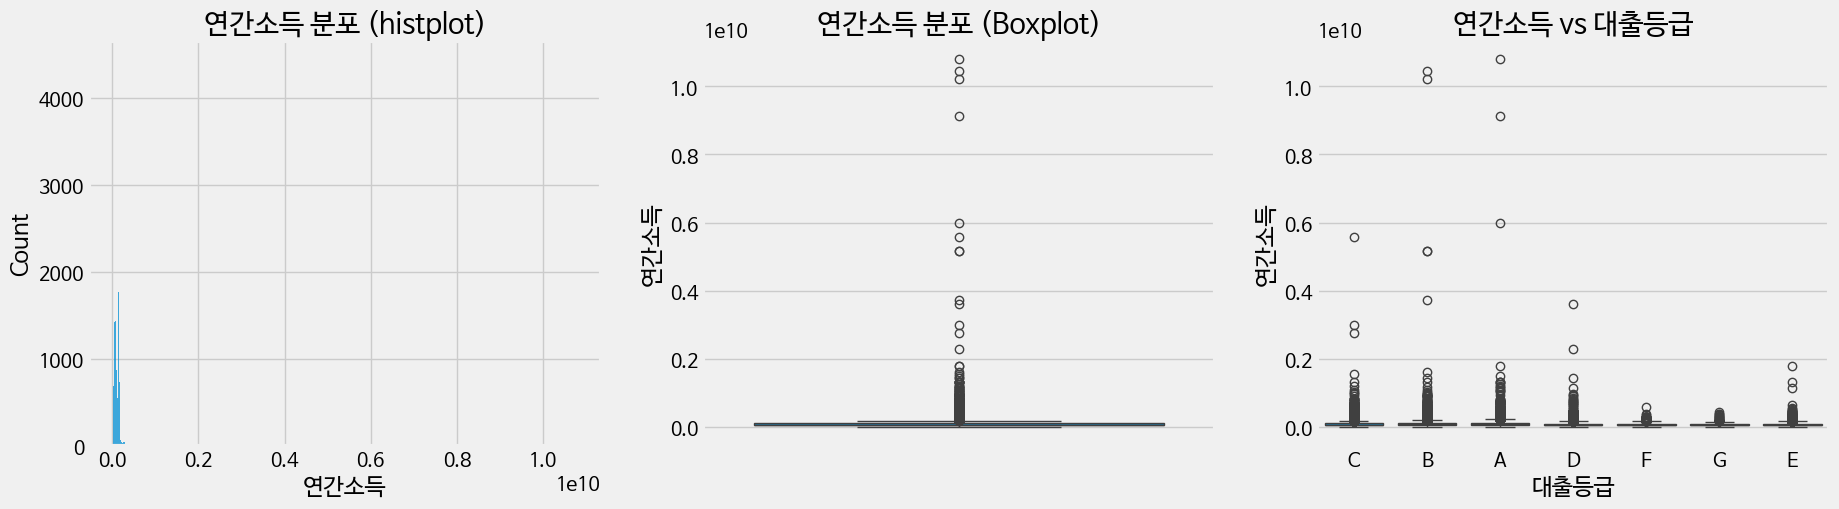

In [65]:
# 연간소득 plot
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df_train, x='연간소득',ax=ax[0])
ax[0].set_title('연간소득 분포 (histplot)')
sns.boxplot(y = df_train['연간소득'], ax=ax[1])
ax[1].set_title('연간소득 분포 (Boxplot)')
sns.boxplot(y =df_train['연간소득'], x = df_train['대출등급'], ax=ax[2])
ax[2].set_title('연간소득 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [66]:
# 대출등급에 따른 연간소득 평균값, 중앙값
df_train.groupby('대출등급')['연간소득'].agg(['mean','median'])

,mean,median
대출등급,,
A,1.124911e+08,96000000.0
B,9.570640e+07,81600000.0
C,8.903804e+07,75600000.0
D,8.359673e+07,72000000.0
E,8.492864e+07,73200000.0
F,8.434506e+07,75430800.0
G,8.258034e+07,70800000.0


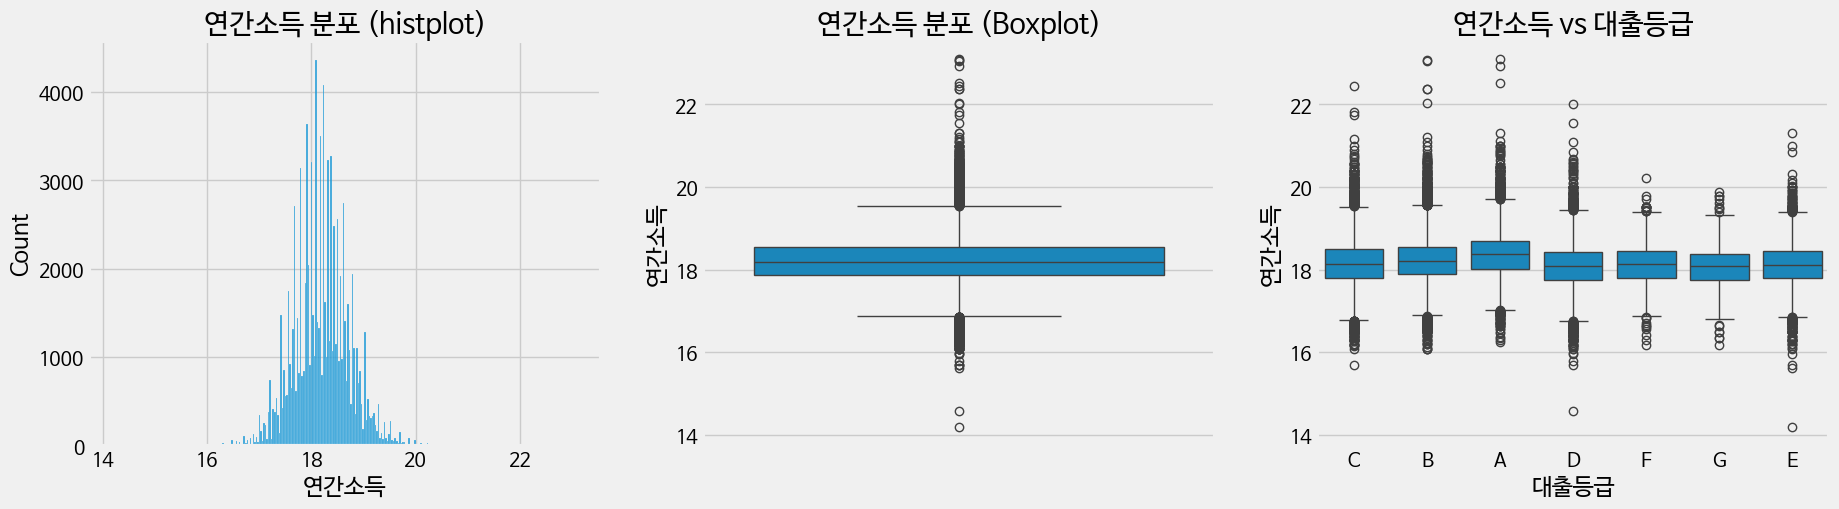

,mean,median
대출등급,,
A,18.378541,18.379859
B,18.219898,18.217340
C,18.149793,18.140967
D,18.088894,18.092177
E,18.117526,18.108706
F,18.130382,18.138724
G,18.074797,18.075370


In [67]:
# log값을 취한 후, 연간소득 plot
df2 = df_train.copy()
df2 = df2.drop(df_train[df_train['연간소득']==0].index) # 연간소득이 0인 고객 제외
df2['연간소득'] = df2['연간소득'].map(lambda i : np.log(i) if i > 0 else 0)
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df2, x='연간소득',ax=ax[0])
ax[0].set_title('연간소득 분포 (histplot)')
sns.boxplot(y = df2['연간소득'], ax=ax[1])
ax[1].set_title('연간소득 분포 (Boxplot)')
sns.boxplot(y =df2['연간소득'], x = df2['대출등급'], ax=ax[2])
ax[2].set_title('연간소득 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()
df2.groupby('대출등급')['연간소득'].agg(['mean','median'])

In [68]:
# 연간소득 == 0 데이터
df_train.iloc[df_train[df_train['연간소득']==0].index,:]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
12498,TRAIN_12498,4440000,36 months,Unknown,MORTGAGE,0,9999.0,20,신용 카드,2,205356,85884.0,0.0,0.0,C


In [69]:
# 연간소득의 값 중 극단적인 값들이 있어서 오른쪽으로 치우친 데이터 분포를 갖고 있음
# 연간소득의 평균 or 중앙값은 대출 등급이 상승함에 따라 증가하는 경향을 보임
# 치우친 분포로 인한 극단적인 이상치 값들에 의해 모델의 성능이 저하될 수 있으므로, 분포를 조정하는 것이 필요함

# 로그값을 취한 후, 데이터 EDA 진행
# 로그값을 취한 후, 데이터의 분포는 정규분포에 가까운 모양을 하게되었음
# 연간소득 대비 대출등급의 분포를 보면, A-C 등급은 다른 등급 대비 높은 연간소득 통계값을 갖는 것을 알 수 있음

# 로그값 이후 plot에서는 데이터를 제외했지만, 연간소득이 0인 고객이 있음
# 해당 고객의 정보를 확인해보면, 대출등급이 C이고 연체를 하지 않은 것을 알 수 있음
# 즉, 연간소득이 누락된 것으로 생각이 됨

# Feature engineering 과정에서 적절한 전처리를 하고자 함

In [70]:
# 부채_대비_소득_비율 통계치 확인
df_train['부채_대비_소득_비율'].describe()

count    96294.000000
mean        19.379590
std         33.569559
min          0.000000
25%         12.650000
50%         18.740000
75%         25.540000
max       9999.000000
Name: 부채_대비_소득_비율, dtype: float64

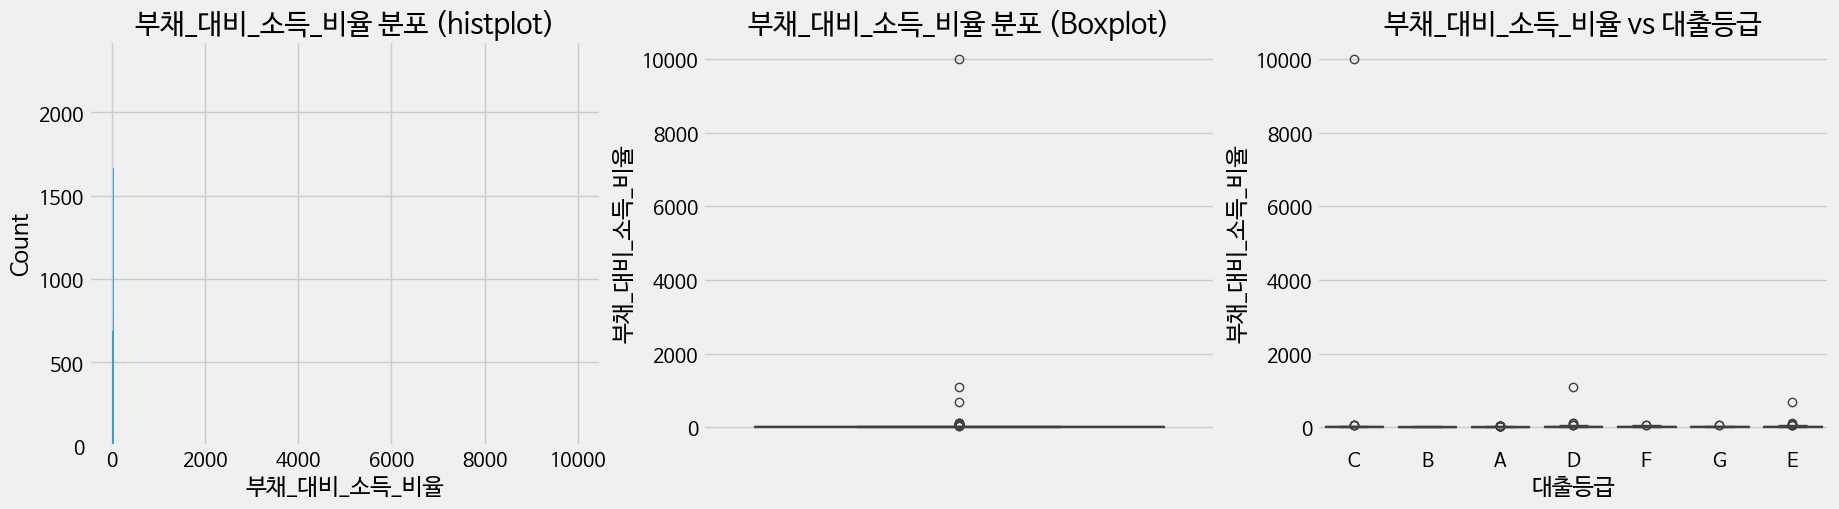

In [71]:
# 부채_대비_소득_비율 plot
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df_train, x='부채_대비_소득_비율',ax=ax[0])
ax[0].set_title('부채_대비_소득_비율 분포 (histplot)')
sns.boxplot(y = df_train['부채_대비_소득_비율'], ax=ax[1])
ax[1].set_title('부채_대비_소득_비율 분포 (Boxplot)')
sns.boxplot(y =df_train['부채_대비_소득_비율'], x = df_train['대출등급'], ax=ax[2])
ax[2].set_title('부채_대비_소득_비율 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()

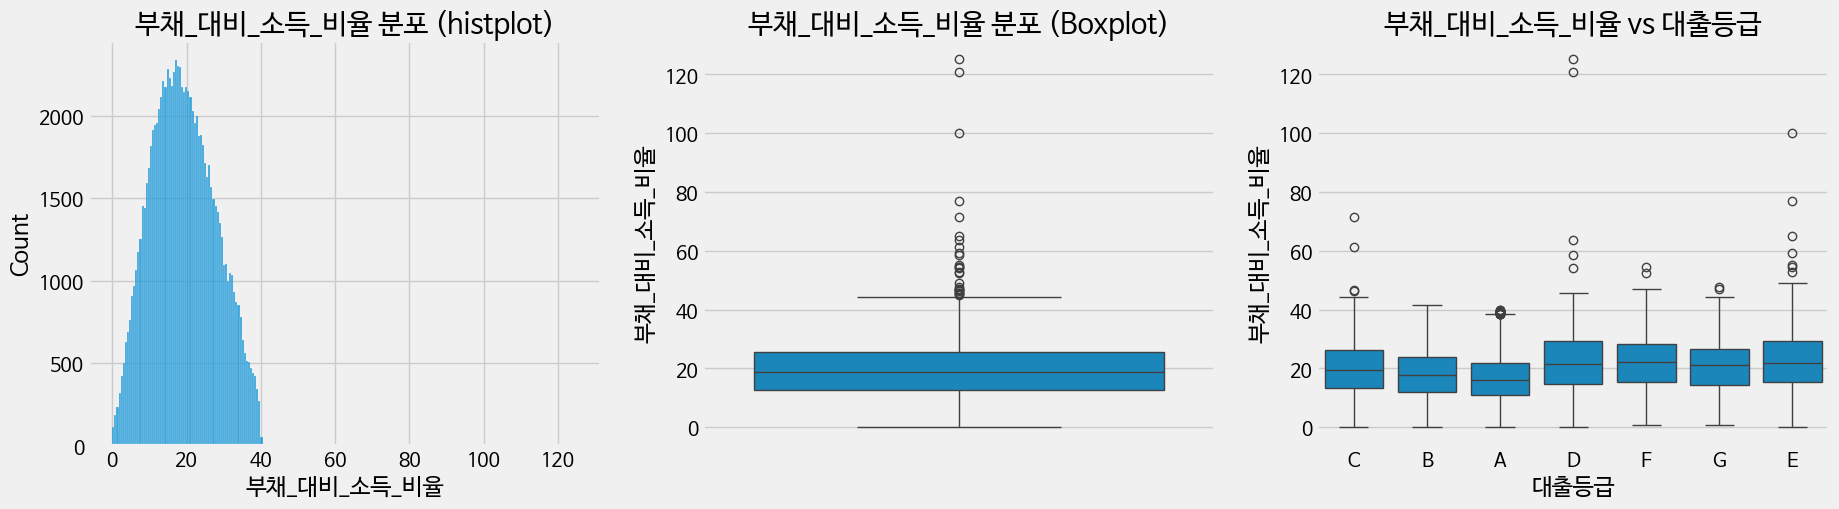

In [72]:
# 이상치(>600) 제거 후, 부채_대비_소득_비율 plot
df2 = df_train.copy()
df2 = df2.drop(df_train[df_train['부채_대비_소득_비율']>600].index) # 부채_대비_소득_비율이 600이상인 고객 제외
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df2, x='부채_대비_소득_비율',ax=ax[0])
ax[0].set_title('부채_대비_소득_비율 분포 (histplot)')
sns.boxplot(y = df2['부채_대비_소득_비율'], ax=ax[1])
ax[1].set_title('부채_대비_소득_비율 분포 (Boxplot)')
sns.boxplot(y =df2['부채_대비_소득_비율'], x = df2['대출등급'], ax=ax[2])
ax[2].set_title('부채_대비_소득_비율 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [73]:
# 부채_대비_소득_비율 >600의 데이터
df_train.iloc[df_train[df_train['부채_대비_소득_비율']>600].index,:]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
12498,TRAIN_12498,4440000,36 months,Unknown,MORTGAGE,0,9999.00,20,신용 카드,2,205356,85884.0,0.0,0.0,C
29129,TRAIN_29129,14400000,36 months,Unknown,RENT,1440000,672.52,13,부채 통합,0,595344,442860.0,0.0,0.0,E
62765,TRAIN_62765,7860000,36 months,Unknown,MORTGAGE,2124000,1092.52,25,신용 카드,2,0,0.0,0.0,0.0,D


In [74]:
# 부채_대비_소득_비율값이 672.52와 1092.52인 데이터의 경우, 어느정도 합리적인 값으로 보임

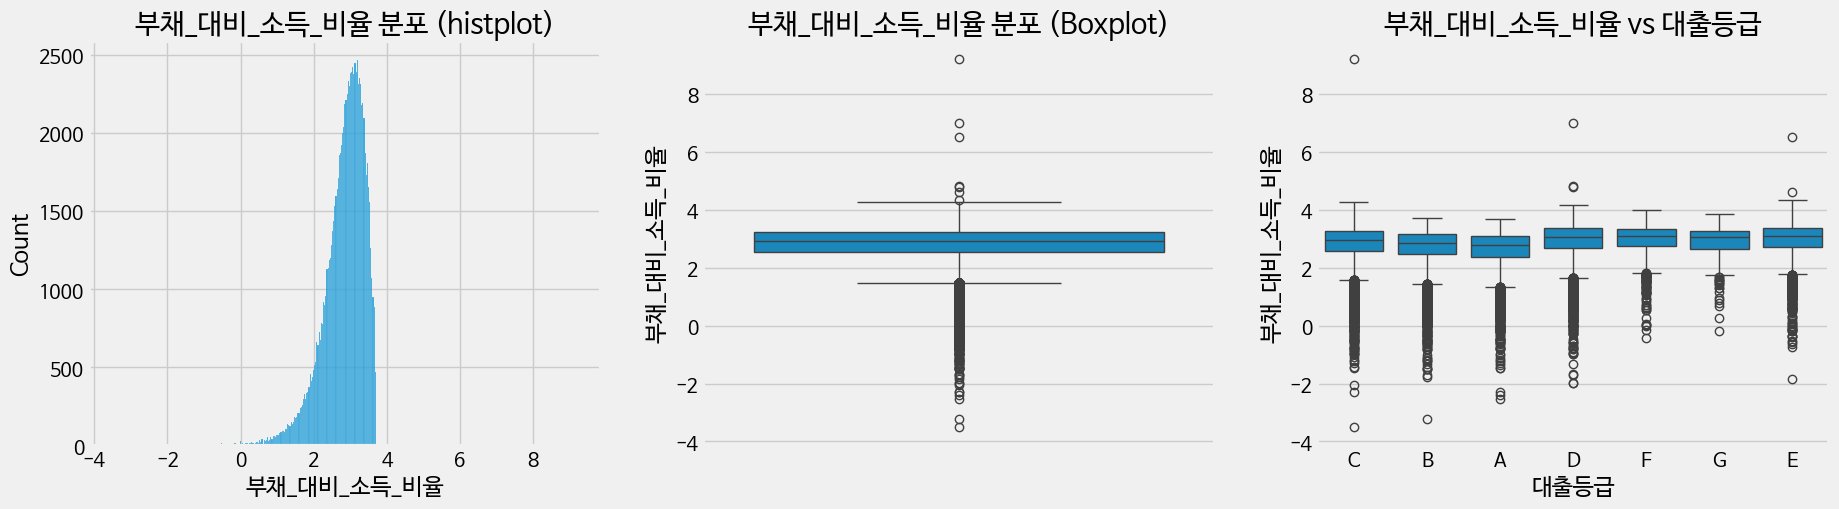

,mean,median
대출등급,,
A,2.669254,2.780681
B,2.764356,2.867899
C,2.861019,2.970927
D,2.947903,3.073156
E,2.977828,3.087628
F,2.969094,3.096708
G,2.904900,3.049035


In [75]:
# log값을 취한 후, 부채_대비_소득_비율 plot
df2 = df_train.copy()
# df2 = df2.drop(df_train[df_train['부채_대비_소득_비율']==0].index) # 부채_대비_소득_비율이 0인 고객 제외
df2['부채_대비_소득_비율'] = df2['부채_대비_소득_비율'].map(lambda i : np.log(i) if i > 0 else 0)
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df2, x='부채_대비_소득_비율',ax=ax[0])
ax[0].set_title('부채_대비_소득_비율 분포 (histplot)')
sns.boxplot(y = df2['부채_대비_소득_비율'], ax=ax[1])
ax[1].set_title('부채_대비_소득_비율 분포 (Boxplot)')
sns.boxplot(y =df2['부채_대비_소득_비율'], x = df2['대출등급'], ax=ax[2])
ax[2].set_title('부채_대비_소득_비율 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()
df2.groupby('대출등급')['부채_대비_소득_비율'].agg(['mean','median'])

In [76]:
# 부채_대비_소득_비율의 분포에서는 극단적인 이상치로 인해 plot을 통한 정확한 분포를 확인하기는 어려움
# 이상치 (>600) 제거 후, 분포 확인
# 부채_대비_소득_비율의 분포는 높은 등급일수록 비율의 값이 낮은 영역으로 분포가 되어 있음을 알 수 있음

# 부채_대비_소득_비율값이 672.52와 1092.52인 데이터의 경우, 어느정도 합리적인 값으로 보임
# 부채_대비_소득_비율값이 9999.0인 경우에는 연간소득이 0인 경우에서 언급한 것처럼 적절한 전처리를 통해 값을 수정해야 할 것으로 보임.

# 로그값을 취한 후, 극단값으로 인한 분포 치우침이 어느정도 해결되었음

In [77]:
# 총계좌수 통계치 확인
df_train['총계좌수'].describe()

count    96294.000000
mean        25.304827
std         12.088566
min          4.000000
25%         17.000000
50%         24.000000
75%         32.000000
max        169.000000
Name: 총계좌수, dtype: float64

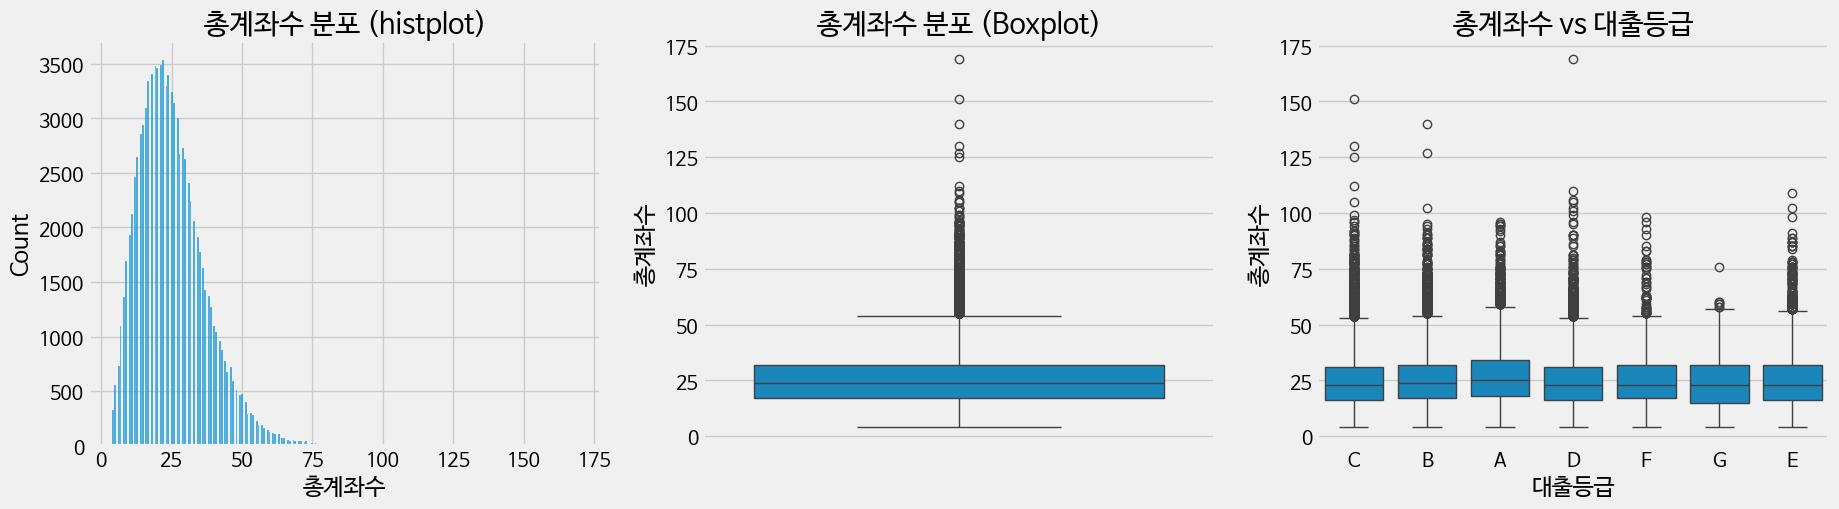

In [78]:
# 총계좌수 plot
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df_train, x='총계좌수',ax=ax[0])
ax[0].set_title('총계좌수 분포 (histplot)')
sns.boxplot(y = df_train['총계좌수'], ax=ax[1])
ax[1].set_title('총계좌수 분포 (Boxplot)')
sns.boxplot(y =df_train['총계좌수'], x = df_train['대출등급'], ax=ax[2])
ax[2].set_title('총계좌수 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [79]:
# 대출등급에 따른 총계좌수 평균값, 중앙값
df_train.groupby('대출등급')['총계좌수'].agg(['mean','median'])

,mean,median
대출등급,,
A,26.910684,25.0
B,25.223375,24.0
C,24.695073,23.0
D,24.705107,23.0
E,25.320642,23.0
F,25.543501,23.0
G,24.550000,23.0


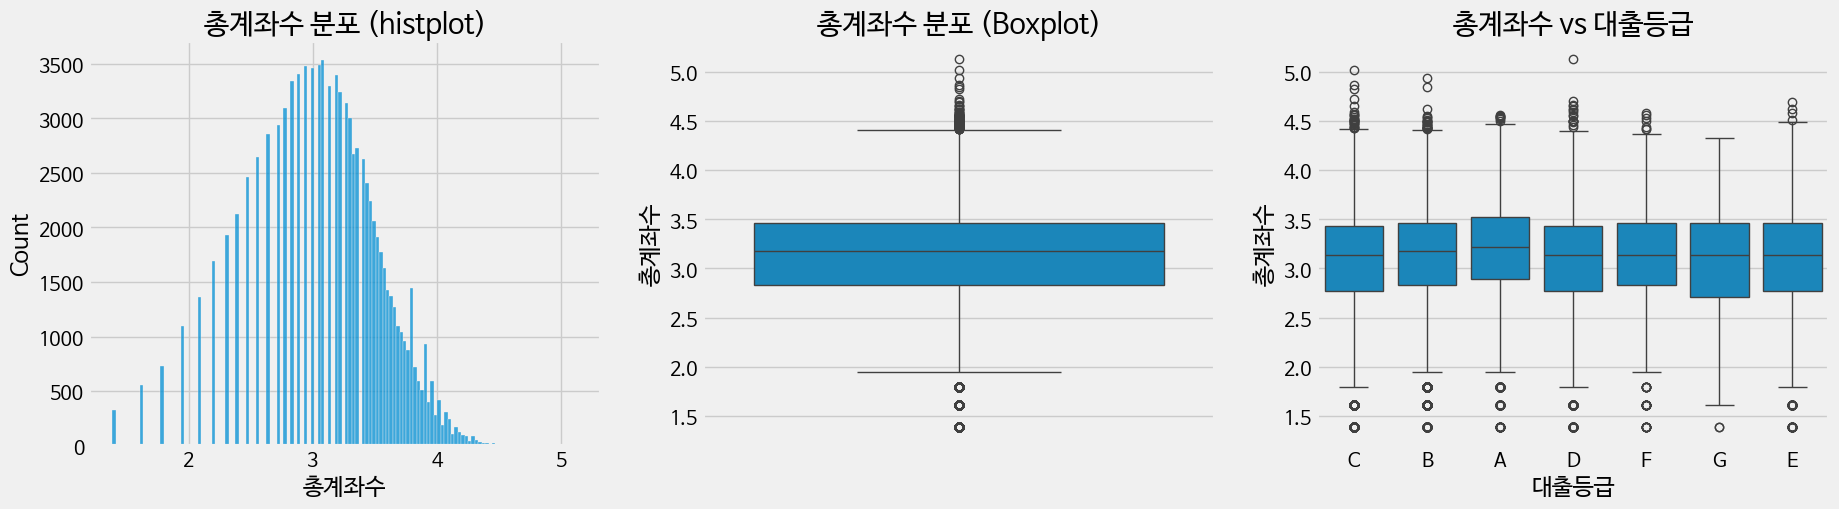

,mean,median
대출등급,,
A,3.192602,3.218876
B,3.114616,3.178054
C,3.080969,3.135494
D,3.078794,3.135494
E,3.105142,3.135494
F,3.113041,3.135494
G,3.059522,3.135494


In [80]:
# log값을 취한 후, 총계좌수 plot
df2 = df_train.copy()
df2['총계좌수'] = df2['총계좌수'].map(lambda i : np.log(i) if i > 0 else 0)
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df2, x='총계좌수',ax=ax[0])
ax[0].set_title('총계좌수 분포 (histplot)')
sns.boxplot(y = df2['총계좌수'], ax=ax[1])
ax[1].set_title('총계좌수 분포 (Boxplot)')
sns.boxplot(y =df2['총계좌수'], x = df2['대출등급'], ax=ax[2])
ax[2].set_title('총계좌수 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()
df2.groupby('대출등급')['총계좌수'].agg(['mean','median'])

In [81]:
df_train.iloc[df_train[df_train['총계좌수']>125].index,:]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
29684,TRAIN_29684,10800000,36 months,10+ years,MORTGAGE,71913600,9.83,130,부채 통합,1,756504,298332.0,0.0,0.0,C
39386,TRAIN_39386,24000000,60 months,10+ years,OWN,84000000,34.90,127,신용 카드,0,300060,194484.0,0.0,0.0,B
57818,TRAIN_57818,14610000,36 months,4 years,MORTGAGE,102000000,30.13,169,부채 통합,0,1272132,792408.0,0.0,0.0,D
66990,TRAIN_66990,14400000,36 months,10+ years,OWN,86400000,26.39,140,신용 카드,0,1396116,454212.0,0.0,0.0,B
68579,TRAIN_68579,42000000,36 months,3 years,RENT,192000000,12.65,151,부채 통합,0,2870028,1403112.0,0.0,0.0,C


In [82]:
# 총계좌수의 분포에서는 극단적으로 높은 이상치로 인해 오른쪽으로 치우친 데이터 분포를 갖고 있음
# 로그값을 취한 후, 데이터 EDA 진행
# 로그값을 취한 후, 계좌수 3을 중심으로 분포가 조정되었음

# A,B등급은 다른 등급에 비해 높은 총계좌수 평균과 중앙값을 갖고 있음
# 총계좌수가 125를 넘는 값들의 데이터를 보았을 때, 큰 문제가 없는 데이터로 보임
# 이상치로 처리하지 않음

In [83]:
# 최근_2년간_연체_횟수 통계치 확인
df_train['최근_2년간_연체_횟수'].describe()

count    96294.000000
mean         0.345681
std          0.919119
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.000000
Name: 최근_2년간_연체_횟수, dtype: float64

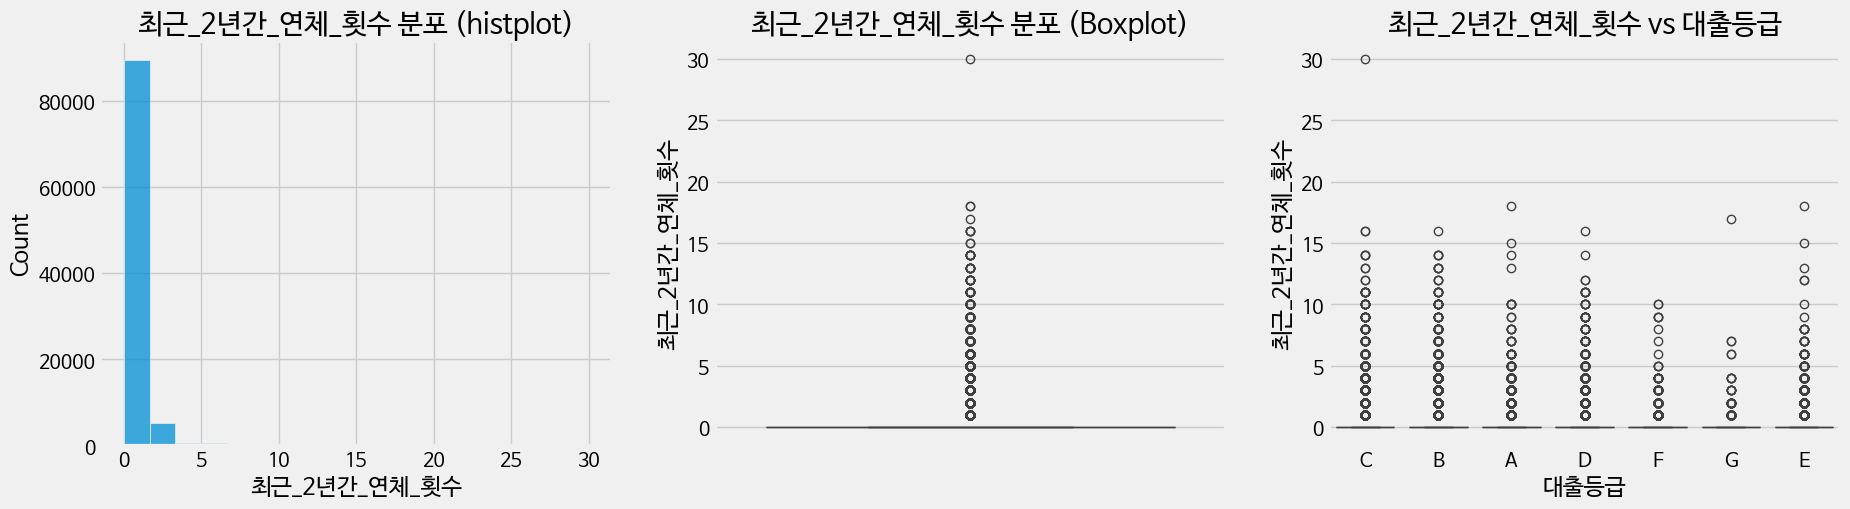

In [84]:
# 최근_2년간_연체_횟수 plot
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df_train, x='최근_2년간_연체_횟수',ax=ax[0])
ax[0].set_title('최근_2년간_연체_횟수 분포 (histplot)')
sns.boxplot(y = df_train['최근_2년간_연체_횟수'], ax=ax[1])
ax[1].set_title('최근_2년간_연체_횟수 분포 (Boxplot)')
sns.boxplot(y =df_train['최근_2년간_연체_횟수'], x = df_train['대출등급'], ax=ax[2])
ax[2].set_title('최근_2년간_연체_횟수 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [85]:
# 대출등급에 따른 최근_2년간_연체_횟수 평균값, 중앙값
df_train.groupby('대출등급')['최근_2년간_연체_횟수'].agg(['mean','median'])

,mean,median
대출등급,,
A,0.218698,0.0
B,0.365409,0.0
C,0.380299,0.0
D,0.384379,0.0
E,0.349334,0.0
F,0.361822,0.0
G,0.416667,0.0


In [86]:
# 최근_2년간_연체_횟수는 대부분 0의 값을 가지며, 일부 이상치 값이 존재하는 것을 확인
# 대출등급에 따른 최근_2년간_연체_횟수의 통계값과 boxplot을 확인한 결과
# 대출등급이 A인 경우 가장 낮은 연체 횟수 평균값을 가지며, 대출등급이 G인 경우 가장 높은 연체 횟수를 가짐
# 연체 여부로 feature를 변환하여 사용하는 것 검토

In [87]:
# 총상환원금 통계치 확인
df_train['총상환원금'].describe()

count    9.629400e+04
mean     8.225035e+05
std      1.027745e+06
min      0.000000e+00
25%      3.075720e+05
50%      5.976960e+05
75%      1.055076e+06
max      4.195594e+07
Name: 총상환원금, dtype: float64

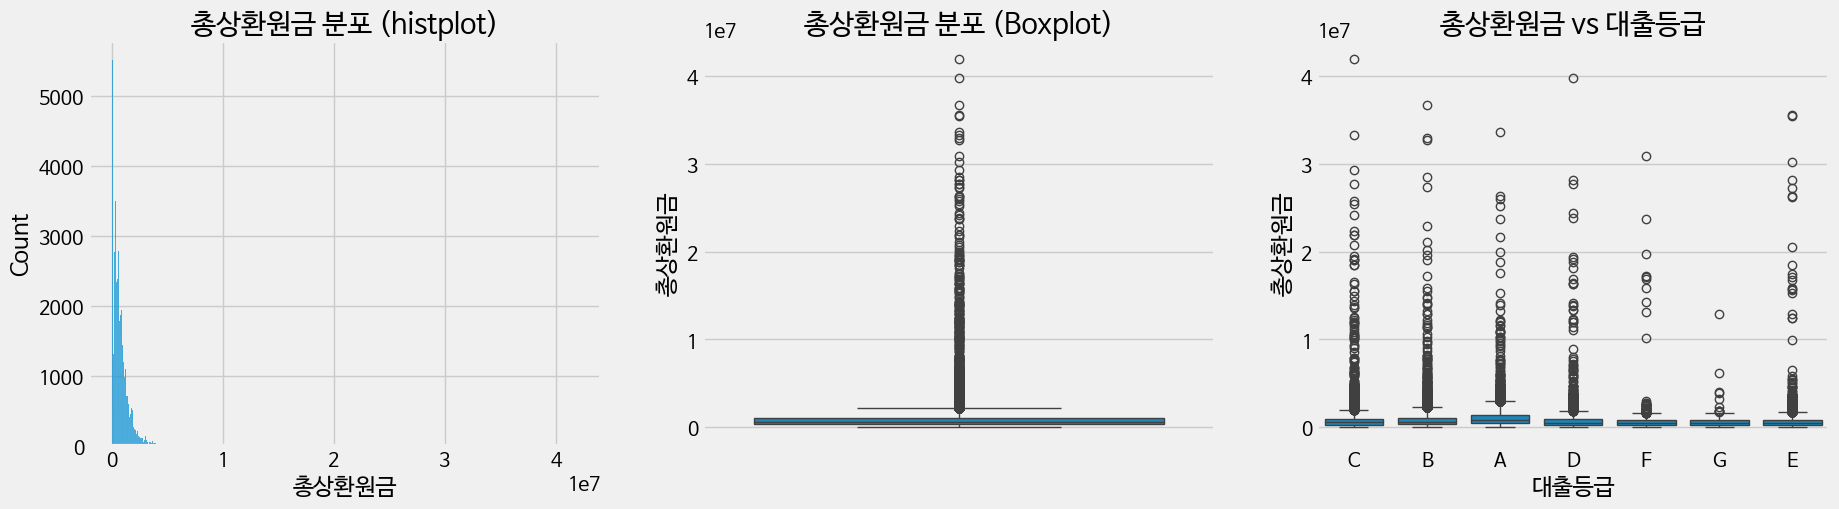

In [88]:
# 총상환원금 plot
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df_train, x='총상환원금',ax=ax[0])
ax[0].set_title('총상환원금 분포 (histplot)')
sns.boxplot(y = df_train['총상환원금'], ax=ax[1])
ax[1].set_title('총상환원금 분포 (Boxplot)')
sns.boxplot(y =df_train['총상환원금'], x = df_train['대출등급'], ax=ax[2])
ax[2].set_title('총상환원금 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [89]:
# 대출등급에 따른 총상환원금 평균값, 중앙값
df_train.groupby('대출등급')['총상환원금'].agg(['mean','median'])

,mean,median
대출등급,,
A,1.066966e+06,830280.0
B,8.340144e+05,606564.0
C,7.521078e+05,552132.0
D,7.297173e+05,528600.0
E,7.074507e+05,523908.0
F,6.673177e+05,490224.0
G,5.870190e+05,442188.0


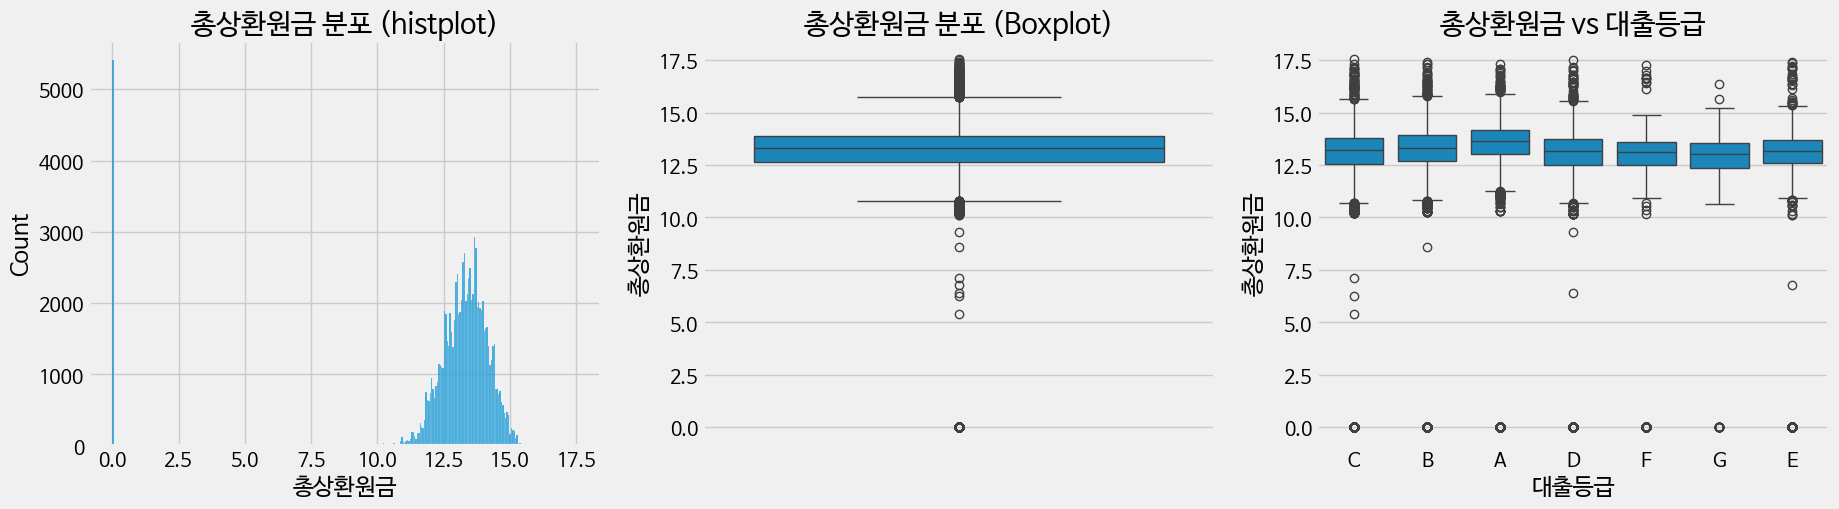

,mean,median
대출등급,,
A,12.929698,13.629518
B,12.599712,13.315566
C,12.457027,13.221542
D,12.472807,13.177987
E,12.483303,13.169071
F,12.374743,13.102618
G,12.235912,12.999490


In [90]:
# log값을 취한 후, 총상환원금 plot
df2 = df_train.copy()
df2['총상환원금'] = df2['총상환원금'].map(lambda i : np.log(i) if i > 0 else 0)
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df2, x='총상환원금',ax=ax[0])
ax[0].set_title('총상환원금 분포 (histplot)')
sns.boxplot(y = df2['총상환원금'], ax=ax[1])
ax[1].set_title('총상환원금 분포 (Boxplot)')
sns.boxplot(y =df2['총상환원금'], x = df2['대출등급'], ax=ax[2])
ax[2].set_title('총상환원금 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()
df2.groupby('대출등급')['총상환원금'].agg(['mean','median'])

In [91]:
# 총상환원금 == 0 데이터 확인
df_train.iloc[df_train[df_train['총상환원금']==0].index,:]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
19,TRAIN_00019,15900000,36 months,Unknown,RENT,41858400,18.34,9,신용 카드,0,0,0.0,0.0,0.0,C
36,TRAIN_00036,7800000,36 months,10+ years,MORTGAGE,86400000,23.10,20,기타,0,0,0.0,0.0,0.0,B
61,TRAIN_00061,2400000,36 months,7 years,MORTGAGE,120000000,20.86,32,기타,0,0,0.0,0.0,0.0,B
90,TRAIN_00090,12000000,60 months,9 years,RENT,78000000,19.87,19,부채 통합,0,0,0.0,0.0,0.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96219,TRAIN_96219,24000000,60 months,< 1 year,RENT,150000000,34.27,22,부채 통합,0,0,0.0,0.0,0.0,C
96224,TRAIN_96224,30000000,60 months,10+ years,OWN,162000000,14.16,37,부채 통합,0,0,0.0,0.0,0.0,E
96252,TRAIN_96252,2580000,36 months,3 years,OWN,79200000,4.60,24,부채 통합,0,0,0.0,0.0,0.0,B
96254,TRAIN_96254,17940000,60 months,3 years,RENT,52800000,24.26,5,부채 통합,0,0,0.0,0.0,0.0,F


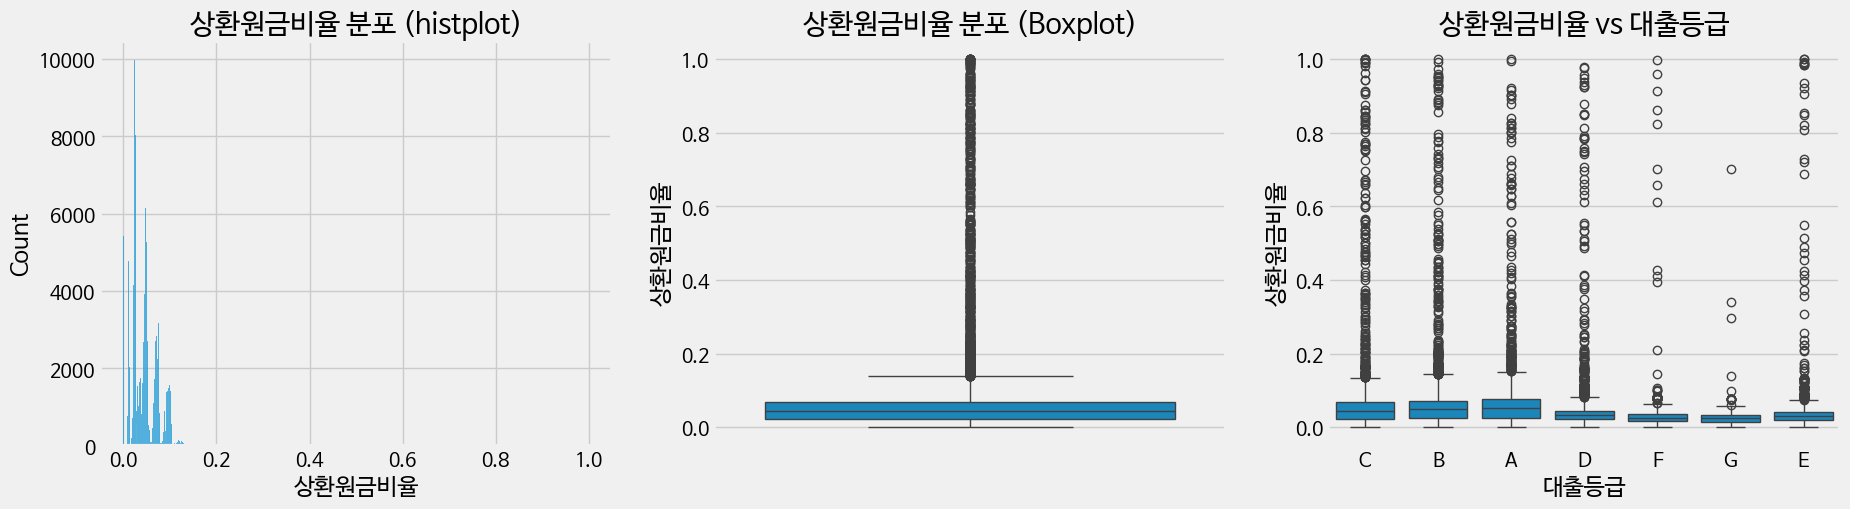

In [92]:
# 총상환원금 비율 plot
df2 = df_train.copy()
df2['상환원금비율'] = df2['총상환원금']/df2['대출금액']
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df2, x='상환원금비율',ax=ax[0])
ax[0].set_title('상환원금비율 분포 (histplot)')
sns.boxplot(y = df2['상환원금비율'], ax=ax[1])
ax[1].set_title('상환원금비율 분포 (Boxplot)')
sns.boxplot(y =df2['상환원금비율'], x = df2['대출등급'], ax=ax[2])
ax[2].set_title('상환원금비율 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [93]:
df2.groupby('대출등급')['상환원금비율'].agg(['mean','median'])

,mean,median
대출등급,,
A,0.060125,0.050795
B,0.051463,0.048074
C,0.045299,0.044845
D,0.040775,0.032909
E,0.034178,0.029984
F,0.029405,0.026098
G,0.025777,0.023624


In [94]:
# 총상환원금에 따른 데이터의 분포를 보면 극단적으로 높은 이상치로 인해 오른쪽으로 치우친 데이터 분포를 갖고 있음
# 로그값을 취한 후, 데이터 EDA 진행
# 총상환원금이 0인 경우를 제외한 데이터에서 전반적으로 총상환원금이 높을수록 대출등급이 높은 경향을 가짐
# 총상환원금이 0인 경우에도 대출등급이 높은 경우가 있음
# 상환원금비율(총상환원금/대출금액)이 증가할수록 대출등급이 상승하는 경향을 보임

In [95]:
# 총상환원금 통계치 확인
df_train['총상환이자'].describe()

count    9.629400e+04
mean     4.282282e+05
std      4.402111e+05
min      0.000000e+00
25%      1.346160e+05
50%      2.870040e+05
75%      5.702160e+05
max      5.653416e+06
Name: 총상환이자, dtype: float64

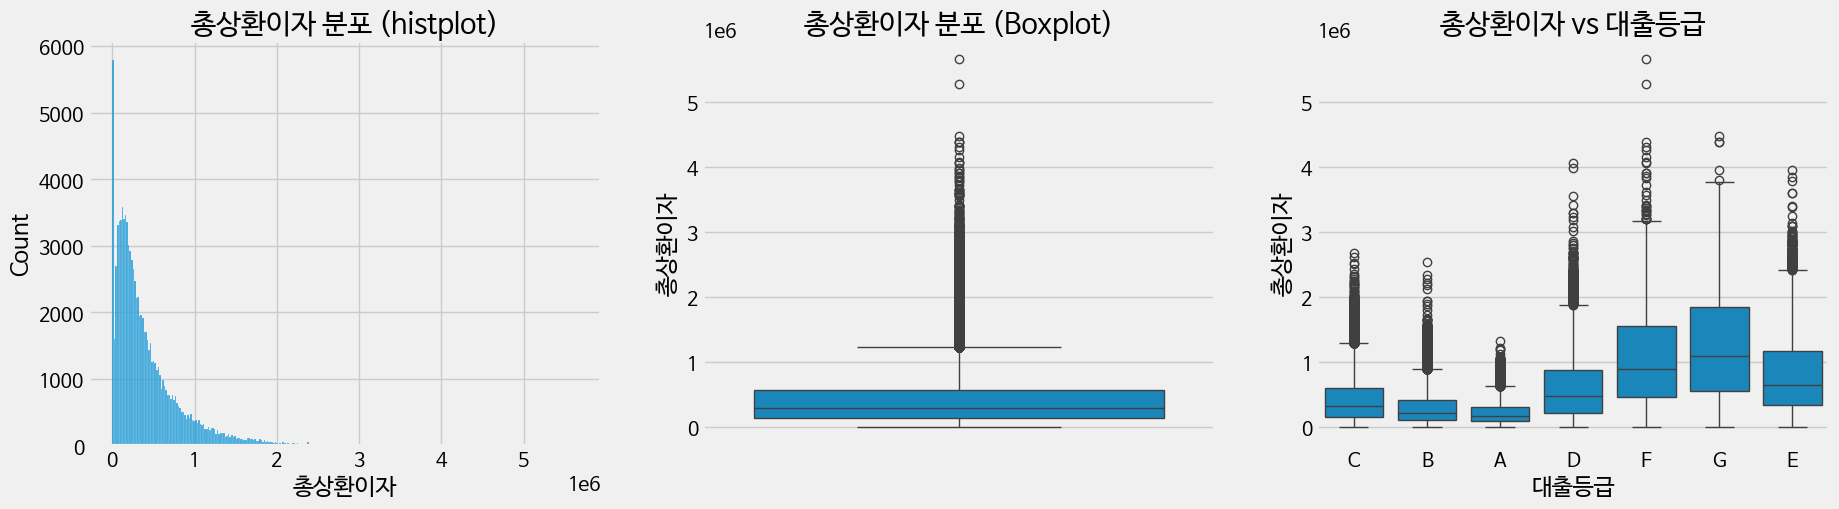

In [96]:
# 총상환이자 plot
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df_train, x='총상환이자',ax=ax[0])
ax[0].set_title('총상환이자 분포 (histplot)')
sns.boxplot(y = df_train['총상환이자'], ax=ax[1])
ax[1].set_title('총상환이자 분포 (Boxplot)')
sns.boxplot(y =df_train['총상환이자'], x = df_train['대출등급'], ax=ax[2])
ax[2].set_title('총상환이자 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [97]:
# 대출등급에 따른 총상환이자 평균값, 중앙값
df_train.groupby('대출등급')['총상환이자'].agg(['mean','median'])

,mean,median
대출등급,,
A,2.240085e+05,175632.0
B,3.033410e+05,222228.0
C,4.306745e+05,323028.0
D,6.117896e+05,474684.0
E,8.146975e+05,653004.0
F,1.095274e+06,900930.0
G,1.284655e+06,1089972.0


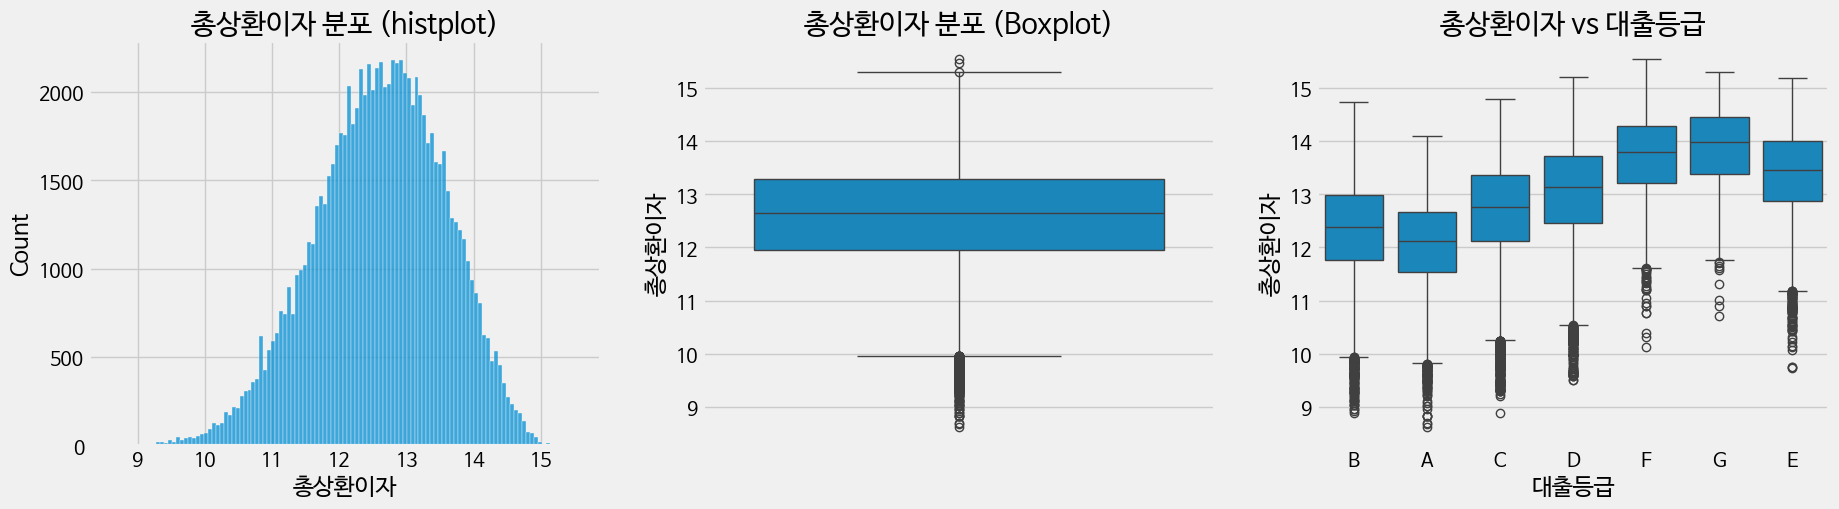

,mean,median
대출등급,,
A,12.078082,12.123256
B,12.345070,12.385540
C,12.682009,12.771051
D,13.032742,13.129188
E,13.381479,13.458796
F,13.695706,13.791595
G,13.834647,13.985552


In [98]:
# log값을 취한 후, 총상환이자 plot
df2 = df_train.copy()
df2['총상환이자'] = df2['총상환이자'].map(lambda i : np.log(i) if i > 0 else 0)
df2 = df2.drop(df2[df2['총상환이자']==0].index)
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df2, x='총상환이자',ax=ax[0])
ax[0].set_title('총상환이자 분포 (histplot)')
sns.boxplot(y = df2['총상환이자'], ax=ax[1])
ax[1].set_title('총상환이자 분포 (Boxplot)')
sns.boxplot(y =df2['총상환이자'], x = df2['대출등급'], ax=ax[2])
ax[2].set_title('총상환이자 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()
df2.groupby('대출등급')['총상환이자'].agg(['mean','median'])

In [99]:
# 원금만 상환한 경우 (이자 납부 X)
print(df_train[(df_train['총상환원금']!=0)&(df_train['총상환이자']==0)].shape)
print(df_train[(df_train['총상환원금']!=0)&(df_train['총상환이자']==0)]['대출등급'].unique())
df_train[(df_train['총상환원금']!=0)&(df_train['총상환이자']==0)].head()

(37, 15)
['A' 'B' 'D' 'C' 'E']


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
1031,TRAIN_01031,28800000,36 months,< 1 year,RENT,144000000,8.09,46,부채 통합,3,307308,0.0,0.0,0.0,A
1717,TRAIN_01717,4800000,36 months,8 years,MORTGAGE,72000000,24.12,23,주택 개선,0,155724,0.0,0.0,0.0,B
2916,TRAIN_02916,1680000,36 months,10+ years,RENT,139200000,23.81,36,주택 개선,0,720000,0.0,0.0,0.0,B
3482,TRAIN_03482,36000000,60 months,3 years,RENT,123600000,7.96,33,부채 통합,0,10824,0.0,0.0,0.0,D
6255,TRAIN_06255,12000000,36 months,< 1 year,RENT,48000000,4.98,10,신용 카드,0,2400000,0.0,0.0,0.0,A


In [100]:
# 이자만 납부한 경우 (원금 상환 X)
print(df_train[(df_train['총상환원금']==0)&(df_train['총상환이자']!=0)].shape)
print(df_train[(df_train['총상환원금']==0)&(df_train['총상환이자']!=0)]['대출등급'].unique())
df_train[(df_train['총상환원금']==0)&(df_train['총상환이자']!=0)]

(5, 15)
['B' 'G' 'C' 'F']


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
22388,TRAIN_22388,16800000,36 months,1 year,MORTGAGE,81600000,36.83,42,신용 카드,0,0,38904.0,27900.0,0.0,B
62119,TRAIN_62119,24420000,60 months,10+ years,RENT,60000000,15.36,6,기타,0,0,1354656.0,72864.0,0.0,G
87055,TRAIN_87055,12000000,36 months,10+ years,MORTGAGE,126000000,21.76,38,부채 통합,0,0,114552.0,0.0,0.0,B
88120,TRAIN_88120,14400000,60 months,5 years,RENT,90000000,15.11,10,부채 통합,0,0,91848.0,18000.0,0.0,C
90818,TRAIN_90818,30000000,60 months,10+ years,MORTGAGE,93600000,16.48,22,부채 통합,0,0,519408.0,42276.0,0.0,F


In [101]:
# 상환을 하지 않은 경우 (총상환원금 & 총상환이자 == 0)
print(df_train[(df_train['총상환원금']==0)&(df_train['총상환이자']==0)].shape)
print(df_train[(df_train['총상환원금']==0)&(df_train['총상환이자']==0)]['대출등급'].unique())
df_train[(df_train['총상환원금']==0)&(df_train['총상환이자']==0)].head()

(5407, 15)
['C' 'B' 'E' 'D' 'A' 'F' 'G']


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
19,TRAIN_00019,15900000,36 months,Unknown,RENT,41858400,18.34,9,신용 카드,0,0,0.0,0.0,0.0,C
36,TRAIN_00036,7800000,36 months,10+ years,MORTGAGE,86400000,23.10,20,기타,0,0,0.0,0.0,0.0,B
61,TRAIN_00061,2400000,36 months,7 years,MORTGAGE,120000000,20.86,32,기타,0,0,0.0,0.0,0.0,B
90,TRAIN_00090,12000000,60 months,9 years,RENT,78000000,19.87,19,부채 통합,0,0,0.0,0.0,0.0,E


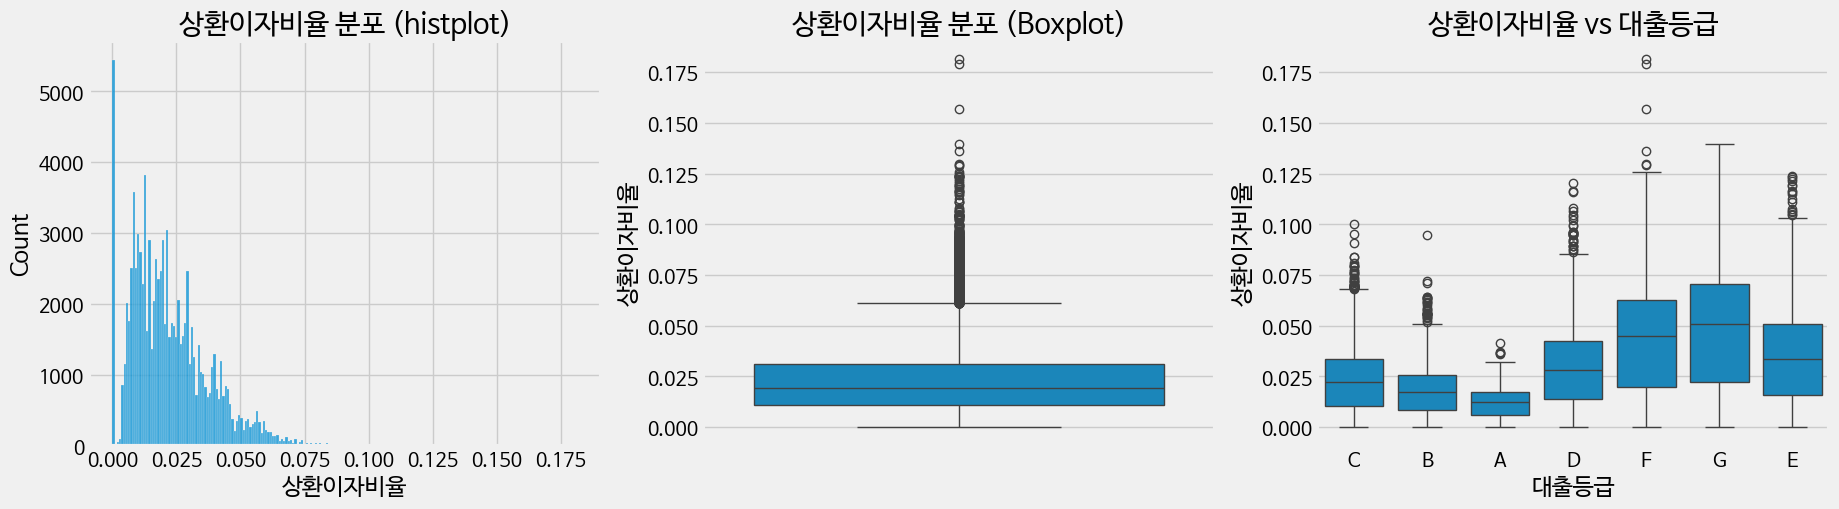

In [102]:
# 총상환이자비율 plot
df2 = df_train.copy()
df2['상환이자비율'] = df2['총상환이자']/df2['대출금액']
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df2, x='상환이자비율',ax=ax[0])
ax[0].set_title('상환이자비율 분포 (histplot)')
sns.boxplot(y = df2['상환이자비율'], ax=ax[1])
ax[1].set_title('상환이자비율 분포 (Boxplot)')
sns.boxplot(y =df2['상환이자비율'], x = df2['대출등급'], ax=ax[2])
ax[2].set_title('상환이자비율 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [103]:
# 총상환이자에 따른 데이터의 분포를 보면 극단적으로 높은 이상치로 인해 오른쪽으로 치우친 데이터 분포를 갖고 있음
# 로그값을 취한 후, 데이터 EDA 진행
# 총상환이자 0인 경우를 제외한 데이터에서 전반적으로 총상환이자가 낮을수록 대출등급이 높은 경향
# 총상환원금과 총상환이자가 0인 경우, 모든 대출 등급이 포함되어 있음
# 총상환원금이 0임에도 이자 상환을 한 경우와 총상환이자가 0임에도 원금을 상환한 경우가 있음
# 이자만 상환한 경우에는 원금만 상환한 경우보다 대출 등급이 낮은 쪽으로 형성되어 있는 것으로 보임
# 상환이자비율(총상환이자/대출금액)가 감소할수록 대출등급이 상승하는 경향을 보임

In [104]:
# 총연체금액 통계치 확인
df_train['총연체금액'].describe()

count    96294.000000
mean        54.380584
std       1414.769218
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      75768.000000
Name: 총연체금액, dtype: float64

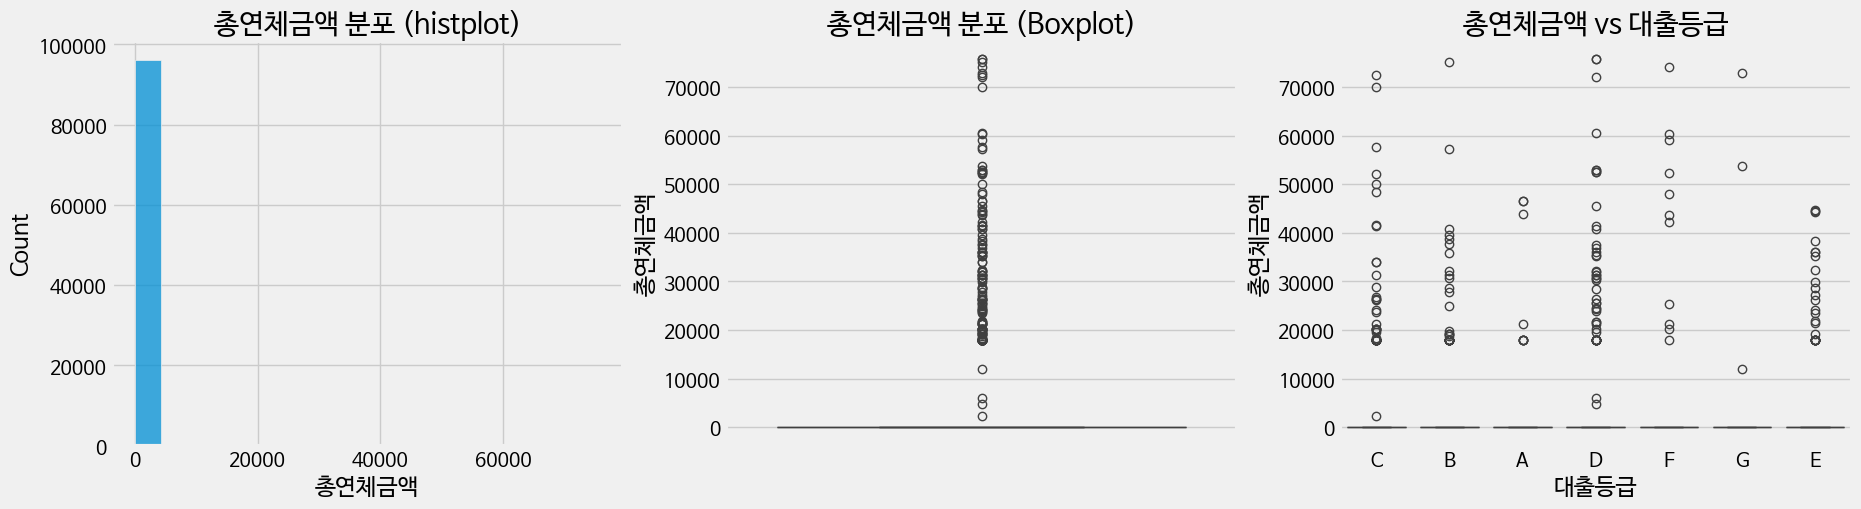

In [105]:
# 총연체금액 plot
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df_train, x='총연체금액',ax=ax[0])
ax[0].set_title('총연체금액 분포 (histplot)')
sns.boxplot(y = df_train['총연체금액'], ax=ax[1])
ax[1].set_title('총연체금액 분포 (Boxplot)')
sns.boxplot(y =df_train['총연체금액'], x = df_train['대출등급'], ax=ax[2])
ax[2].set_title('총연체금액 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [106]:
# 연체금액이 있는 고객의 수
df_train[df_train['총연체금액']!=0].shape[0]

181

In [107]:
# 대출등급에 따른 연간소득과 총연체금액
df_train.groupby('대출등급')[['연간소득','총연체금액']].agg(['mean','median'])

연간소득                   총연체금액       
              mean      median        mean median
대출등급                                             
A     1.124911e+08  96000000.0   14.806105    0.0
B     9.570640e+07  81600000.0   29.441371    0.0
C     8.903804e+07  75600000.0   48.052565    0.0
D     8.359673e+07  72000000.0  113.352104    0.0
E     8.492864e+07  73200000.0   94.572206    0.0
F     8.434506e+07  75430800.0  237.801433    0.0
G     8.258034e+07  70800000.0  329.942857    0.0

In [108]:
# 대부분의 고객에서 연체금액은 0임
# 181명의 고객에서만 연체금액이 존재함
# 전반적으로 연체 금액의 평균이 높아질수록 대출등급이 낮아지는 경향
# 모든 대출 등급에서 연체금액을 가진 고객이 있기 때문에 feature로 사용하는 것이 좋은지에 대한 고민은 필요해 보임
# feature로 사용한다면 연체금액보다는 연체 여부로 변환하는 것이 좋을 것으로 생각됨

In [109]:
# 연체계좌수 통계치 확인
df_train['연체계좌수'].describe()

count    96294.000000
mean         0.005805
std          0.079966
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: 연체계좌수, dtype: float64

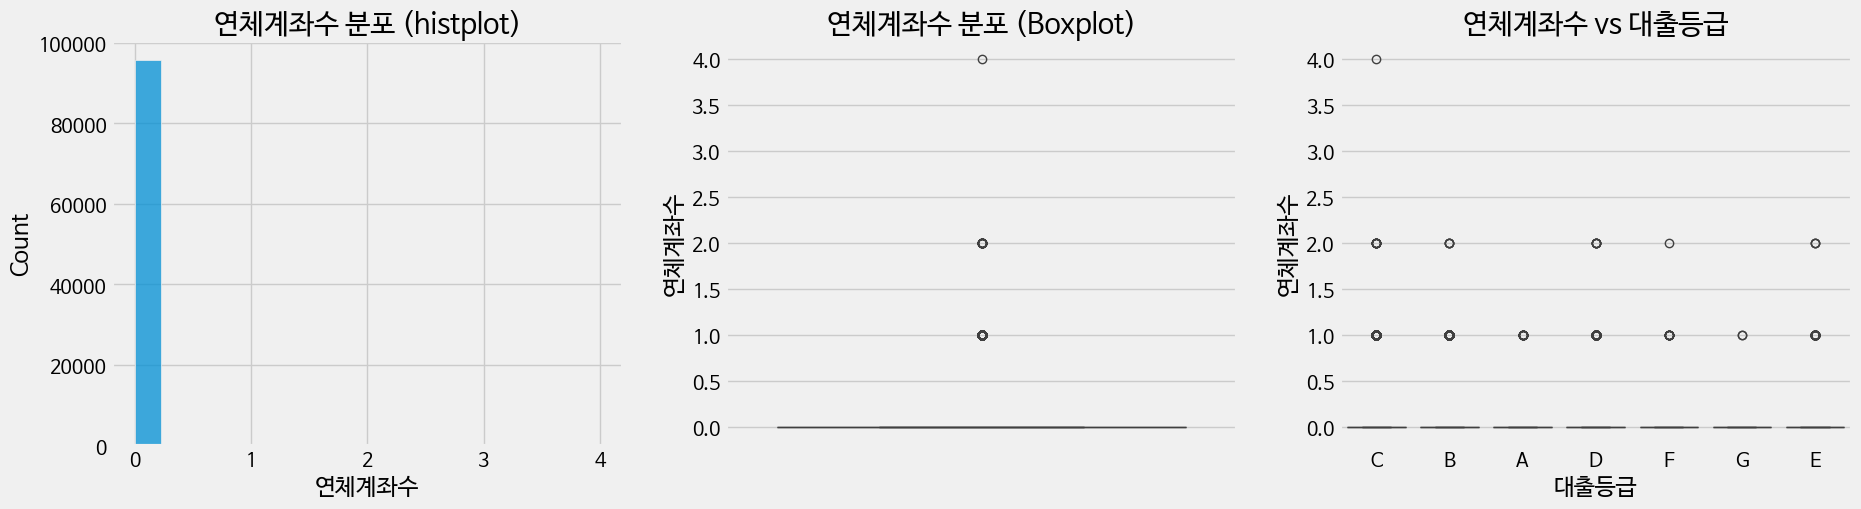

In [110]:
# 연체계좌수 plot
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.histplot(df_train, x='연체계좌수',ax=ax[0])
ax[0].set_title('연체계좌수 분포 (histplot)')
sns.boxplot(y = df_train['연체계좌수'], ax=ax[1])
ax[1].set_title('연체계좌수 분포 (Boxplot)')
sns.boxplot(y =df_train['연체계좌수'], x = df_train['대출등급'], ax=ax[2])
ax[2].set_title('연체계좌수 vs 대출등급')
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [111]:
# 연체계좌 보유 고객의 수
df_train[df_train['연체계좌수']!=0].shape[0]

532

In [112]:
# 대출등급에 따른 연간소득과 총연체금액
df_train.groupby('대출등급')[['연간소득','연체계좌수']].agg(['mean','median'])

연간소득                 연체계좌수       
              mean      median      mean median
대출등급                                           
A     1.124911e+08  96000000.0  0.001133    0.0
B     9.570640e+07  81600000.0  0.004789    0.0
C     8.903804e+07  75600000.0  0.007892    0.0
D     8.359673e+07  72000000.0  0.008462    0.0
E     8.492864e+07  73200000.0  0.007615    0.0
F     8.434506e+07  75430800.0  0.006653    0.0
G     8.258034e+07  70800000.0  0.004762    0.0

In [113]:
# 대부분의 고객에서 연체계좌수는 0이며, 532명의 고객에서만 연체계좌가 존재함
# 전반적으로 연체계좌 수의 경향은 대출등급과는 큰 관련이 없어보임
# 모델 구성시, feature에서 제외하는 것 검토

In [114]:
# 요약
# 대출등급 (Target label)
# 대출등급은 A-G까지 총 7개의 등급으로 이루어져 있음.
# C,B 등급의 고객수가 가장 많으며, A,D,E,F,G의 순으로 고객의 수가 감소함.

# 대출기간
# 대출기간이 36개월인 고객수가 60개월인 고객수 대비 약 2배 가량 많음.
# 대출기간별 고객등급의 비율을 보면, B-E까지의 비율이 차이를 보임.

# 근로기간
# 근로기간에 따른 대출등급의 경향 중 1년과 2년차에는 C등급의 고객수가 많은 것을 제외하면,
# 전반적으로 대출등급의 비율은 유사한 수준임.
# Unknown 변수를 처리하는 방법에 대한 고민이 필요함.

# 주택소유상태
# 주택소유상태는 ANY, MORTGAGE, OWN, RENT가 있으나, ANY는 1건이 있음.
# -> feature engineering 과정에서 적절하게 처리해보고자 함.
# 주택소유상태에 따른 대출등급의 경향에서 C,B,A,D까지의 고객수 경향은 동일하지만, E,F,G 고객수의 경향에서 차이를 보임.

# 대출목적
# 대출목적 중 부채 통합이 가장 많으며, 신용카드, 주택 개선, 기타, 주요구매, 의료, 자동차, 사업, 이사, 주택, 재생에너지의 순으로 감소함.
# 각 대출목적에 따라 대출등급의 분포가 다른 경향을 보임.
# train 데이터에 없는 신규 목적이 있는 경우 어떻게 어떤 방식으로 처리할지에 대한 고민이 필요함.

# 대출금액
# 대출금액의 분포는 이상치가 확인되지 않으며, 낮은 금액대에 상대적으로 많이 분포해 있음.
# 대출금액과 대출등급은 음의 상관관계를 보임.

# 연간소득
# 매우 오른쪽으로 치우친 (positively skewed) 데이터 분포를 갖고 있음.
# 연간소득의 평균 혹은 중앙값은 대출 등급이 상승함에 따라 증가하는 경향을 보임.
# 연간소득이 0인 고객이 1명 있음.
# -> Feature engineering 과정에서 적절한 전처리를 하고자 함.

# 부채_대비_소득_비율
# 부채_대비_소득_비율의 분포는 높은 등급일수록 비율의 값이 낮은 영역으로 분포가 되어 있음

# 총계좌수
# 매우 오른쪽으로 치우친 (positively skewed) 데이터 분포를 갖고 있음.
# A,B등급은 다른 등급에 비해 높은 총계좌수 평균과 중앙값을 갖고 있음.

# 최근_2년간_연체_횟수
# 최근_2년간_연체_횟수는 대부분 0의 값을 가지며, 일부 이상치 값이 존재하는 것을 확인할 수 있음.
# 대출등급이 A인 경우 가장 낮은 연체 횟수 평균값을 가지며, 대출등급이 G인 경우 가장 높은 연체 횟수를 가짐.
# 연체 여부로 feature를 변환하여 사용하는 것 검토

# 총상환원금
# 매우 오른쪽으로 치우친 (positively skewed) 데이터 분포를 갖고 있음.
# 총상환원금이 0인 경우를 제외한 데이터에서 전반적으로 총상환원금이 높을수록 대출등급이 높은 경향을 가짐. 하지만 총상환원금이 0인 경우에도 대출등급이 높은 경우가 있음.
# 상환원금비율(총상환원금/대출금액)이 증가할수록 대출등급이 상승하는 경향을 보임.

# 총상환이자
# 매우 오른쪽으로 치우친 (positively skewed) 데이터 분포를 갖고 있음.
# 총상환이자이 0인 경우를 제외한 데이터에서 전반적으로 총상환이자가 낮을수록 대출등급이 높은 경향을 가짐.
# 상환이자비율(총상환이자/대출금액)가 감소할수록 대출등급이 상승하는 경향을 보임.

# 총연체금액
# 대부분의 고객에서 연체금액은 0이며, 181명의 고객에서만 연체금액이 존재함.
# 전반적으로 연체 금액의 평균이 높아질수록 대출등급이 낮아지는 경향을 보임.
# -> 연체 여부를 feature로 사용하는 것 검토

# 연체계좌수
# 대부분의 고객에서 연체계좌수는 0이며, 532명의 고객에서만 연체계좌가 존재함.
# 전반적으로 연체계좌 수의 경향은 대출등급과는 큰 관련이 없어보임.
# -> 모델 구성시, feature에서 제외하는 것 검토

In [115]:
# Feature Engineering
# 훈련 및 테스트 데이터셋 분할
# df_train을 train 데이터와 test 데이터로 나누어서 모델을 학습

In [116]:
from sklearn.model_selection import train_test_split
df2 = df_train.copy()
# 대출등급 수치화
df2['대출등급'] = df2['대출등급'].replace('A',6)
df2['대출등급'] = df2['대출등급'].replace('B',5)
df2['대출등급'] = df2['대출등급'].replace('C',4)
df2['대출등급'] = df2['대출등급'].replace('D',3)
df2['대출등급'] = df2['대출등급'].replace('E',2)
df2['대출등급'] = df2['대출등급'].replace('F',1)
df2['대출등급'] = df2['대출등급'].replace('G',0)

# 훈련 및 시험 데이터 세트 분리
y = df2['대출등급'].copy()
X = df2[df2.columns[1:-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [117]:
# 대출기간
# 36개월 == 0, 60개월 == 1로 변환
X_train['대출기간'] = X_train['대출기간'].replace(' 36 months',0)
X_train['대출기간'] = X_train['대출기간'].replace(' 60 months',1)
X_train.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
90976,18000000,0,10+ years,OWN,120000000,11.38,40,부채 통합,2,815268,400980.0,0.0,0.0
6214,30000000,0,10+ years,MORTGAGE,163200000,18.79,43,신용 카드,0,1372272,781104.0,0.0,0.0
74815,12000000,1,3 years,RENT,78000000,16.71,26,부채 통합,0,506856,706416.0,0.0,0.0
14875,20400000,1,10+ years,RENT,93600000,15.35,24,부채 통합,1,249456,177540.0,0.0,0.0
92763,9600000,0,5 years,MORTGAGE,38400000,35.18,12,부채 통합,0,217224,94776.0,0.0,0.0


In [119]:
# 근로기간
# 근로기간별 고객수
# 근로기간 Unknown에 대한 계산 필요
X_train.groupby('근로기간')[['근로기간']].count()

,근로기간
근로기간,
1 year,5064
10+ years,25920
2 years,6728
3 years,6128
4 years,4503
5 years,4512
6 years,3108
7 years,3021
8 years,3911


In [120]:
# 각 근로기간을 숫자로 변경 (<1 year -> 0, 10+ years -> 10)
X_train['근로기간'] = X_train['근로기간'].replace('< 1 year',0)
X_train['근로기간'] = X_train['근로기간'].replace('1 year',1)
X_train['근로기간'] = X_train['근로기간'].replace('2 years',2)
X_train['근로기간'] = X_train['근로기간'].replace('3 years',3)
X_train['근로기간'] = X_train['근로기간'].replace('4 years',4)
X_train['근로기간'] = X_train['근로기간'].replace('5 years',5)
X_train['근로기간'] = X_train['근로기간'].replace('6 years',6)
X_train['근로기간'] = X_train['근로기간'].replace('7 years',7)
X_train['근로기간'] = X_train['근로기간'].replace('8 years',8)
X_train['근로기간'] = X_train['근로기간'].replace('9 years',9)
X_train['근로기간'] = X_train['근로기간'].replace('10+ years',10)

In [121]:
# 근로기간에 따라 연간소득이 증가하는 경향으로 가정 (선형회귀)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
idx = X_train[X_train['근로기간']=='Unknown'].index
df2 = X_train.copy()
df2_num = df2.drop(idx, axis = 0)

# 기존 연간소득과 근로기간으로 학습
lr.fit(df2_num[['연간소득']], df2_num['근로기간'])

# Unknown 근로기간에 대한 예측
for i in idx:
    X_train.loc[i,'근로기간'] = int(lr.predict([[X_train.loc[i,['연간소득']].item()]]))

X_train.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
90976,18000000,0,10,OWN,120000000,11.38,40,부채 통합,2,815268,400980.0,0.0,0.0
6214,30000000,0,10,MORTGAGE,163200000,18.79,43,신용 카드,0,1372272,781104.0,0.0,0.0
74815,12000000,1,3,RENT,78000000,16.71,26,부채 통합,0,506856,706416.0,0.0,0.0
14875,20400000,1,10,RENT,93600000,15.35,24,부채 통합,1,249456,177540.0,0.0,0.0
92763,9600000,0,5,MORTGAGE,38400000,35.18,12,부채 통합,0,217224,94776.0,0.0,0.0


In [122]:
X_train['근로기간'].unique()

array([10, 3, 5, 8, 2, 4, 0, 1, 7, 6, 9], dtype=object)

In [123]:
# 주택소유상태
# 주택소유 상태는 one-hot encoding 처리
## ANY의 경우 삭제

X_train = X_train.drop(X_train[X_train['주택소유상태']=='ANY'].index)
X_train = pd.get_dummies(X_train, columns = ['주택소유상태'])
X_train.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,주택소유상태_MORTGAGE,주택소유상태_OWN,주택소유상태_RENT
90976,18000000,0,10,120000000,11.38,40,부채 통합,2,815268,400980.0,0.0,0.0,False,True,False
6214,30000000,0,10,163200000,18.79,43,신용 카드,0,1372272,781104.0,0.0,0.0,True,False,False
74815,12000000,1,3,78000000,16.71,26,부채 통합,0,506856,706416.0,0.0,0.0,False,False,True
14875,20400000,1,10,93600000,15.35,24,부채 통합,1,249456,177540.0,0.0,0.0,False,False,True
92763,9600000,0,5,38400000,35.18,12,부채 통합,0,217224,94776.0,0.0,0.0,True,False,False


In [124]:
# 차원수 감소를 위해 주택소유상태_OWN을 제거
## 주택소유상태_MORTGAGE와 주택소유상태_RENT가 모두 0인 경우가 주택소유상태_OWN을 의미

X_train = X_train.drop('주택소유상태_OWN', axis = 1)
X_train.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,주택소유상태_MORTGAGE,주택소유상태_RENT
90976,18000000,0,10,120000000,11.38,40,부채 통합,2,815268,400980.0,0.0,0.0,False,False
6214,30000000,0,10,163200000,18.79,43,신용 카드,0,1372272,781104.0,0.0,0.0,True,False
74815,12000000,1,3,78000000,16.71,26,부채 통합,0,506856,706416.0,0.0,0.0,False,True
14875,20400000,1,10,93600000,15.35,24,부채 통합,1,249456,177540.0,0.0,0.0,False,True
92763,9600000,0,5,38400000,35.18,12,부채 통합,0,217224,94776.0,0.0,0.0,True,False


In [125]:
# 대출목적
# 각 대출 목적에 대해 one-hot encoding 처리
## train 데이터에 있는 목적 이외의 값이 들어올 경우, 기타로 처리 (시험 데이터의 경우)

train_p_list = list(X_train['대출목적'].unique())
for p in train_p_list:
    if p not in train_p_list:
        X_train['대출목적'] = X_train['대출목적'].replace(p,'기타')

# 부채통합, 신용카드, 주택 개선, 기타 이유를 제외한 범주는 기타로 변환
for i in train_p_list[4:]:
    X_train['대출목적'] = X_train['대출목적'].replace(i,'기타')


X_train = pd.get_dummies(X_train, columns = ['대출목적'])
X_train.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,주택소유상태_MORTGAGE,주택소유상태_RENT,대출목적_기타,대출목적_부채 통합,대출목적_신용 카드,대출목적_주택 개선
90976,18000000,0,10,120000000,11.38,40,2,815268,400980.0,0.0,0.0,False,False,False,True,False,False
6214,30000000,0,10,163200000,18.79,43,0,1372272,781104.0,0.0,0.0,True,False,False,False,True,False
74815,12000000,1,3,78000000,16.71,26,0,506856,706416.0,0.0,0.0,False,True,False,True,False,False
14875,20400000,1,10,93600000,15.35,24,1,249456,177540.0,0.0,0.0,False,True,False,True,False,False
92763,9600000,0,5,38400000,35.18,12,0,217224,94776.0,0.0,0.0,True,False,False,True,False,False


In [127]:
# 부채통합, 신용카드, 주택 개선, 기타 이외의 범주의 고객수가 적으므로 기타로 변환하여 처리

In [128]:
# 신규 feature 추가 (원금상환비율 & 이자상환비율)

# 원금상환비율
X_train['원금상환비율'] = X_train['총상환원금']/X_train['대출금액']
# 이자상환비율
X_train['이자상환비율'] = X_train['총상환이자']/X_train['대출금액']
X_train.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,주택소유상태_MORTGAGE,주택소유상태_RENT,대출목적_기타,대출목적_부채 통합,대출목적_신용 카드,대출목적_주택 개선,원금상환비율,이자상환비율
90976,18000000,0,10,120000000,11.38,40,2,815268,400980.0,0.0,0.0,False,False,False,True,False,False,0.045293,0.022277
6214,30000000,0,10,163200000,18.79,43,0,1372272,781104.0,0.0,0.0,True,False,False,False,True,False,0.045742,0.026037
74815,12000000,1,3,78000000,16.71,26,0,506856,706416.0,0.0,0.0,False,True,False,True,False,False,0.042238,0.058868
14875,20400000,1,10,93600000,15.35,24,1,249456,177540.0,0.0,0.0,False,True,False,True,False,False,0.012228,0.008703
92763,9600000,0,5,38400000,35.18,12,0,217224,94776.0,0.0,0.0,True,False,False,True,False,False,0.022627,0.009872


In [129]:
# 연간소득
# 연간소득 == 0 고객 정보
idx = X_train[X_train['연간소득']==0].index
X_train.loc[idx,:]

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,주택소유상태_MORTGAGE,주택소유상태_RENT,대출목적_기타,대출목적_부채 통합,대출목적_신용 카드,대출목적_주택 개선,원금상환비율,이자상환비율
12498,4440000,0,5,0,9999.0,20,2,205356,85884.0,0.0,0.0,True,False,False,False,True,False,0.046251,0.019343


In [130]:
# 연간소득은 대출등급과 양의 관계를 갖기 때문에 대출등급 C인 고객의 중앙값으로 연간소득을 대체하고, 부채_대비_소득_비율을 계산하여 대체함.

In [131]:
# 연간소득이 0인 고객의 대출 등급의 중앙값으로 소득값 대체
idx = list(X_train[X_train['연간소득']==0].index)
if not idx:
    for i in idx:
        grade = X_train.loc[idx,'대출등급']
        X_train.loc[idx,'연간소득'] = X_train[X_train['대출등급']==grade]['연간소득'].median()
        X_train.loc[idx,'부채_대비_소득_비율'] = round(X_train.iloc[idx]['대출금액']/X_train.iloc[idx]['연간소득'],1)
        X_train.loc[idx]

In [132]:
# log로 처리하여 데이터 분포 조정
X_train['연간소득'] = X_train['연간소득'].map(lambda i : np.log(i) if i > 0 else 0)
# 분포 조정 후, 연간소득의 통계값
X_train['연간소득'].describe()

count    77035.000000
mean        18.198768
std          0.540594
min          0.000000
25%         17.869033
50%         18.172219
75%         18.534723
max         23.102812
Name: 연간소득, dtype: float64

In [133]:
# 정규화: 데이터 분포를 0~1사이로 변경
from sklearn.preprocessing import MinMaxScaler
mms_1 = MinMaxScaler()
mms_1.fit(X_train[['연간소득']])
X_train_scaled = mms_1.transform(X_train[['연간소득']])
X_train['연간소득'] = X_train_scaled
X_train.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,주택소유상태_MORTGAGE,주택소유상태_RENT,대출목적_기타,대출목적_부채 통합,대출목적_신용 카드,대출목적_주택 개선,원금상환비율,이자상환비율
90976,18000000,0,10,0.805227,11.38,40,2,815268,400980.0,0.0,0.0,False,False,False,True,False,False,0.045293,0.022277
6214,30000000,0,10,0.818536,18.79,43,0,1372272,781104.0,0.0,0.0,True,False,False,False,True,False,0.045742,0.026037
74815,12000000,1,3,0.786580,16.71,26,0,506856,706416.0,0.0,0.0,False,True,False,True,False,False,0.042238,0.058868
14875,20400000,1,10,0.794472,15.35,24,1,249456,177540.0,0.0,0.0,False,True,False,True,False,False,0.012228,0.008703
92763,9600000,0,5,0.755907,35.18,12,0,217224,94776.0,0.0,0.0,True,False,False,True,False,False,0.022627,0.009872


In [134]:
# 대출금액
# 정규화: 데이터 분포를 0~1사이로 변경
mms_2 = MinMaxScaler()
mms_2.fit(X_train[['대출금액']])
X_train_scaled = mms_2.transform(X_train[['대출금액']])
X_train['대출금액'] = X_train_scaled
X_train.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,주택소유상태_MORTGAGE,주택소유상태_RENT,대출목적_기타,대출목적_부채 통합,대출목적_신용 카드,대출목적_주택 개선,원금상환비율,이자상환비율
90976,0.411765,0,10,0.805227,11.38,40,2,815268,400980.0,0.0,0.0,False,False,False,True,False,False,0.045293,0.022277
6214,0.705882,0,10,0.818536,18.79,43,0,1372272,781104.0,0.0,0.0,True,False,False,False,True,False,0.045742,0.026037
74815,0.264706,1,3,0.786580,16.71,26,0,506856,706416.0,0.0,0.0,False,True,False,True,False,False,0.042238,0.058868
14875,0.470588,1,10,0.794472,15.35,24,1,249456,177540.0,0.0,0.0,False,True,False,True,False,False,0.012228,0.008703
92763,0.205882,0,5,0.755907,35.18,12,0,217224,94776.0,0.0,0.0,True,False,False,True,False,False,0.022627,0.009872


In [135]:
# 부채_대비_소득_비율
# log로 처리하여 데이터 분포 조정
X_train['부채_대비_소득_비율'] = X_train['부채_대비_소득_비율'].map(lambda i : np.log(i) if i > 0 else 0)
# 분포 조정 후, 연간소득의 통계값
X_train['부채_대비_소득_비율'].describe()

count    77035.000000
mean         2.821050
std          0.588300
min         -3.506558
25%          2.536866
50%          2.927989
75%          3.240246
max          9.210240
Name: 부채_대비_소득_비율, dtype: float64

In [136]:
# 정규화: 데이터 분포를 0~1사이로 변경
mms_3 = MinMaxScaler()
mms_3.fit(X_train[['부채_대비_소득_비율']])
X_train_scaled = mms_3.transform(X_train[['부채_대비_소득_비율']])
X_train['부채_대비_소득_비율'] = X_train_scaled
X_train.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,주택소유상태_MORTGAGE,주택소유상태_RENT,대출목적_기타,대출목적_부채 통합,대출목적_신용 카드,대출목적_주택 개선,원금상환비율,이자상환비율
90976,0.411765,0,10,0.805227,0.466974,40,2,815268,400980.0,0.0,0.0,False,False,False,True,False,False,0.045293,0.022277
6214,0.705882,0,10,0.818536,0.506408,43,0,1372272,781104.0,0.0,0.0,True,False,False,False,True,False,0.045742,0.026037
74815,0.264706,1,3,0.786580,0.497182,26,0,506856,706416.0,0.0,0.0,False,True,False,True,False,False,0.042238,0.058868
14875,0.470588,1,10,0.794472,0.490507,24,1,249456,177540.0,0.0,0.0,False,True,False,True,False,False,0.012228,0.008703
92763,0.205882,0,5,0.755907,0.555724,12,0,217224,94776.0,0.0,0.0,True,False,False,True,False,False,0.022627,0.009872


In [137]:
# 총계좌수
# log로 처리하여 데이터 분포 조정
X_train['총계좌수'] = X_train['총계좌수'].map(lambda i : np.log(i) if i > 0 else 0)
# 분포 조정 후, 연간소득의 통계값
X_train['총계좌수'].describe()

count    77035.000000
mean         3.112616
std          0.506552
min          1.386294
25%          2.833213
50%          3.178054
75%          3.465736
max          5.129899
Name: 총계좌수, dtype: float64

In [138]:
# 정규화: 데이터 분포를 0~1사이로 변경
mms_4 = MinMaxScaler()
mms_4.fit(X_train[['총계좌수']])
X_train_scaled = mms_4.transform(X_train[['총계좌수']])
X_train['총계좌수'] = X_train_scaled
X_train.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,주택소유상태_MORTGAGE,주택소유상태_RENT,대출목적_기타,대출목적_부채 통합,대출목적_신용 카드,대출목적_주택 개선,원금상환비율,이자상환비율
90976,0.411765,0,10,0.805227,0.466974,0.615072,2,815268,400980.0,0.0,0.0,False,False,False,True,False,False,0.045293,0.022277
6214,0.705882,0,10,0.818536,0.506408,0.634390,0,1372272,781104.0,0.0,0.0,True,False,False,False,True,False,0.045742,0.026037
74815,0.264706,1,3,0.786580,0.497182,0.500000,0,506856,706416.0,0.0,0.0,False,True,False,True,False,False,0.042238,0.058868
14875,0.470588,1,10,0.794472,0.490507,0.478619,1,249456,177540.0,0.0,0.0,False,True,False,True,False,False,0.012228,0.008703
92763,0.205882,0,5,0.755907,0.555724,0.293464,0,217224,94776.0,0.0,0.0,True,False,False,True,False,False,0.022627,0.009872


In [139]:
# 최근_2년간_연체_횟수
# 총연체금액이 있는지 여부에 따른 새로운 변수 생성
X_train['최근_2년간_연체_여부'] = 0
X_train[X_train['최근_2년간_연체_여부']>0] = 1
# 총연체금액 변수는 제거
X_train = X_train.drop('최근_2년간_연체_횟수', axis = 1)
X_train.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,총상환원금,총상환이자,총연체금액,연체계좌수,주택소유상태_MORTGAGE,주택소유상태_RENT,대출목적_기타,대출목적_부채 통합,대출목적_신용 카드,대출목적_주택 개선,원금상환비율,이자상환비율,최근_2년간_연체_여부
90976,0.411765,0,10,0.805227,0.466974,0.615072,815268,400980.0,0.0,0.0,False,False,False,True,False,False,0.045293,0.022277,0
6214,0.705882,0,10,0.818536,0.506408,0.634390,1372272,781104.0,0.0,0.0,True,False,False,False,True,False,0.045742,0.026037,0
74815,0.264706,1,3,0.786580,0.497182,0.500000,506856,706416.0,0.0,0.0,False,True,False,True,False,False,0.042238,0.058868,0
14875,0.470588,1,10,0.794472,0.490507,0.478619,249456,177540.0,0.0,0.0,False,True,False,True,False,False,0.012228,0.008703,0
92763,0.205882,0,5,0.755907,0.555724,0.293464,217224,94776.0,0.0,0.0,True,False,False,True,False,False,0.022627,0.009872,0


In [140]:
# 총상환원금
# log로 처리하여 데이터 분포 조정
X_train['총상환원금'] = X_train['총상환원금'].map(lambda i : np.log(i) if i > 0 else 0)
# 분포 조정 후, 연간소득의 통계값
X_train['총상환원금'].describe()

count    77035.000000
mean        12.591610
std          3.157758
min          0.000000
25%         12.636074
50%         13.296391
75%         13.866339
max         17.552130
Name: 총상환원금, dtype: float64

In [141]:
# 정규화: 데이터 분포를 0~1사이로 변경
mms_5 = MinMaxScaler()
mms_5.fit(X_train[['총상환원금']])
X_train_scaled = mms_5.transform(X_train[['총상환원금']])
X_train['총상환원금'] = X_train_scaled
X_train.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,총상환원금,총상환이자,총연체금액,연체계좌수,주택소유상태_MORTGAGE,주택소유상태_RENT,대출목적_기타,대출목적_부채 통합,대출목적_신용 카드,대출목적_주택 개선,원금상환비율,이자상환비율,최근_2년간_연체_여부
90976,0.411765,0,10,0.805227,0.466974,0.615072,0.775477,400980.0,0.0,0.0,False,False,False,True,False,False,0.045293,0.022277,0
6214,0.705882,0,10,0.818536,0.506408,0.634390,0.805143,781104.0,0.0,0.0,True,False,False,False,True,False,0.045742,0.026037,0
74815,0.264706,1,3,0.786580,0.497182,0.500000,0.748398,706416.0,0.0,0.0,False,True,False,True,False,False,0.042238,0.058868,0
14875,0.470588,1,10,0.794472,0.490507,0.478619,0.708007,177540.0,0.0,0.0,False,True,False,True,False,False,0.012228,0.008703,0
92763,0.205882,0,5,0.755907,0.555724,0.293464,0.700125,94776.0,0.0,0.0,True,False,False,True,False,False,0.022627,0.009872,0


In [142]:
# 총상환이자
# log로 처리하여 데이터 분포 조정
X_train['총상환이자'] = X_train['총상환이자'].map(lambda i : np.log(i) if i > 0 else 0)
# 분포 조정 후, 연간소득의 통계값
X_train['총상환이자'].describe()

count    77035.000000
mean        11.897838
std          3.038994
min          0.000000
25%         11.808218
50%         12.564195
75%         13.249468
max         15.478518
Name: 총상환이자, dtype: float64

In [143]:
# 정규화: 데이터 분포를 0~1사이로 변경
mms_6 = MinMaxScaler()
mms_6.fit(X_train[['총상환이자']])
X_train_scaled = mms_6.transform(X_train[['총상환이자']])
X_train['총상환이자'] = X_train_scaled
X_train.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,총상환원금,총상환이자,총연체금액,연체계좌수,주택소유상태_MORTGAGE,주택소유상태_RENT,대출목적_기타,대출목적_부채 통합,대출목적_신용 카드,대출목적_주택 개선,원금상환비율,이자상환비율,최근_2년간_연체_여부
90976,0.411765,0,10,0.805227,0.466974,0.615072,0.775477,0.833521,0.0,0.0,False,False,False,True,False,False,0.045293,0.022277,0
6214,0.705882,0,10,0.818536,0.506408,0.634390,0.805143,0.876600,0.0,0.0,True,False,False,False,True,False,0.045742,0.026037,0
74815,0.264706,1,3,0.786580,0.497182,0.500000,0.748398,0.870107,0.0,0.0,False,True,False,True,False,False,0.042238,0.058868,0
14875,0.470588,1,10,0.794472,0.490507,0.478619,0.708007,0.780886,0.0,0.0,False,True,False,True,False,False,0.012228,0.008703,0
92763,0.205882,0,5,0.755907,0.555724,0.293464,0.700125,0.740334,0.0,0.0,True,False,False,True,False,False,0.022627,0.009872,0


In [144]:
# 총연체금액
# 총연체금액이 있는지 여부에 따른 새로운 변수 생성
X_train['총연체금액_여부'] = 0
X_train[X_train['총연체금액']>0]['총연체금액_여부'] = 1
# 총연체금액 변수는 제거
X_train = X_train.drop('총연체금액', axis = 1)
X_train.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,총상환원금,총상환이자,연체계좌수,주택소유상태_MORTGAGE,주택소유상태_RENT,대출목적_기타,대출목적_부채 통합,대출목적_신용 카드,대출목적_주택 개선,원금상환비율,이자상환비율,최근_2년간_연체_여부,총연체금액_여부
90976,0.411765,0,10,0.805227,0.466974,0.615072,0.775477,0.833521,0.0,False,False,False,True,False,False,0.045293,0.022277,0,0
6214,0.705882,0,10,0.818536,0.506408,0.634390,0.805143,0.876600,0.0,True,False,False,False,True,False,0.045742,0.026037,0,0
74815,0.264706,1,3,0.786580,0.497182,0.500000,0.748398,0.870107,0.0,False,True,False,True,False,False,0.042238,0.058868,0,0
14875,0.470588,1,10,0.794472,0.490507,0.478619,0.708007,0.780886,0.0,False,True,False,True,False,False,0.012228,0.008703,0,0
92763,0.205882,0,5,0.755907,0.555724,0.293464,0.700125,0.740334,0.0,True,False,False,True,False,False,0.022627,0.009872,0,0


In [145]:
# 연체계좌수
# 연체계좌 feature 제거
X_train = X_train.drop('연체계좌수', axis = 1)
X_train.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,총상환원금,총상환이자,주택소유상태_MORTGAGE,주택소유상태_RENT,대출목적_기타,대출목적_부채 통합,대출목적_신용 카드,대출목적_주택 개선,원금상환비율,이자상환비율,최근_2년간_연체_여부,총연체금액_여부
90976,0.411765,0,10,0.805227,0.466974,0.615072,0.775477,0.833521,False,False,False,True,False,False,0.045293,0.022277,0,0
6214,0.705882,0,10,0.818536,0.506408,0.634390,0.805143,0.876600,True,False,False,False,True,False,0.045742,0.026037,0,0
74815,0.264706,1,3,0.786580,0.497182,0.500000,0.748398,0.870107,False,True,False,True,False,False,0.042238,0.058868,0,0
14875,0.470588,1,10,0.794472,0.490507,0.478619,0.708007,0.780886,False,True,False,True,False,False,0.012228,0.008703,0,0
92763,0.205882,0,5,0.755907,0.555724,0.293464,0.700125,0.740334,True,False,False,True,False,False,0.022627,0.009872,0,0


In [146]:
# 테스트 데이터 변환
# train data 변환 방법을 이용하여 데이터 변환 진행

# 대출기간
X_test['대출기간'] = X_test['대출기간'].replace(' 36 months',0)
X_test['대출기간'] = X_test['대출기간'].replace(' 60 months',1)

# 근로기간
## 수치형으로 변환
X_test['근로기간'] = X_test['근로기간'].replace('< 1 year',0)
X_test['근로기간'] = X_test['근로기간'].replace('1 year',1)
X_test['근로기간'] = X_test['근로기간'].replace('2 years',2)
X_test['근로기간'] = X_test['근로기간'].replace('3 years',3)
X_test['근로기간'] = X_test['근로기간'].replace('4 years',4)
X_test['근로기간'] = X_test['근로기간'].replace('5 years',5)
X_test['근로기간'] = X_test['근로기간'].replace('6 years',6)
X_test['근로기간'] = X_test['근로기간'].replace('7 years',7)
X_test['근로기간'] = X_test['근로기간'].replace('8 years',8)
X_test['근로기간'] = X_test['근로기간'].replace('9 years',9)
X_test['근로기간'] = X_test['근로기간'].replace('10+ years',10)
## Unknown에 대한 값 계산 (train데이터로 학습시킨 선형회귀 사용)
idx = X_test[X_test['근로기간']=='Unknown'].index
### Unknown 근로기간에 대한 예측
for i in idx:
    X_test.loc[i,'근로기간'] = int(lr.predict([[X_test.loc[i,['연간소득']].item()]]))

# 주택소유상태
## ANY의 경우 삭제
y_test = y_test.drop(X_test[X_test['주택소유상태']=='ANY'].index)
X_test = X_test.drop(X_test[X_test['주택소유상태']=='ANY'].index)
X_test = pd.get_dummies(X_test, columns = ['주택소유상태'])
X_test = X_test.drop('주택소유상태_OWN', axis = 1)


# 대출목적
test_p_list = list(X_test['대출목적'].unique())
for p in test_p_list:
    if p not in train_p_list:
        X_test['대출목적'] = X_test['대출목적'].replace(p,'기타')

## 부채통합, 신용카드, 주택 개선, 기타 이유를 제외한 범주는 기타로 변환
for i in train_p_list[4:]:
    X_test['대출목적'] = X_test['대출목적'].replace(i,'기타')

X_test = pd.get_dummies(X_test, columns = ['대출목적'])


# 신규 feature 추가
X_test['원금상환비율'] = X_test['총상환원금']/X_test['대출금액']
X_test['이자상환비율'] = X_test['총상환이자']/X_test['대출금액']

# 연간소득
idx = list(X_test[X_test['연간소득']==0].index)
if not idx:
    for i in idx:
        grade = X_test.loc[idx,'대출등급']
        X_test.loc[idx,'연간소득'] = X_test[X_test['대출등급']==grade]['연간소득'].median()
        X_test.loc[idx,'부채_대비_소득_비율'] = round(X_test.iloc[idx]['대출금액']/X_test.iloc[idx]['연간소득'],1)
        X_test.loc[idx]

X_test['연간소득'] = X_test['연간소득'].map(lambda i : np.log(i) if i > 0 else 0)
X_test_scaled = mms_1.transform(X_test[['연간소득']])
X_test['연간소득'] = X_test_scaled

# 대출금액 (train 데이터 기반 범주 사용)
X_test_scaled = mms_2.transform(X_test[['대출금액']])
X_test['대출금액'] = X_test_scaled


# 부채_대비_소득_비율 (train 데이터 기반 범주 사용)
X_test['부채_대비_소득_비율'] = X_test['부채_대비_소득_비율'].map(lambda i : np.log(i) if i > 0 else 0)
X_test_scaled = mms_3.transform(X_test[['부채_대비_소득_비율']])
X_test['부채_대비_소득_비율'] = X_test_scaled

# 총계좌수
X_test['총계좌수'] = X_test['총계좌수'].map(lambda i : np.log(i) if i > 0 else 0)
X_test_scaled = mms_4.transform(X_test[['총계좌수']])
X_test['총계좌수'] = X_test_scaled


# 최근_2년간_연체_여부
X_test['최근_2년간_연체_여부'] = 0
X_test[X_test['최근_2년간_연체_여부']>0] = 1
X_test = X_test.drop('최근_2년간_연체_횟수', axis = 1)

# 총상환원금
X_test['총상환원금'] = X_test['총상환원금'].map(lambda i : np.log(i) if i > 0 else 0)
X_test_scaled = mms_5.transform(X_test[['총상환원금']])
X_test['총상환원금'] = X_test_scaled

# 총상환이자
X_test['총상환이자'] = X_test['총상환이자'].map(lambda i : np.log(i) if i > 0 else 0)
X_test_scaled = mms_6.transform(X_test[['총상환이자']])
X_test['총상환이자'] = X_test_scaled

# 총연체금액
X_test['총연체금액_여부'] = 0
X_test[X_test['총연체금액']>0]['총연체금액_여부'] = 1
X_test = X_test.drop('총연체금액', axis = 1)

# 연체계좌수
X_test = X_test.drop('연체계좌수', axis = 1)

In [147]:
X_train

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,총상환원금,총상환이자,주택소유상태_MORTGAGE,주택소유상태_RENT,대출목적_기타,대출목적_부채 통합,대출목적_신용 카드,대출목적_주택 개선,원금상환비율,이자상환비율,최근_2년간_연체_여부,총연체금액_여부
90976,0.411765,0,10,0.805227,0.466974,0.615072,0.775477,0.833521,False,False,False,True,False,False,0.045293,0.022277,0,0
6214,0.705882,0,10,0.818536,0.506408,0.634390,0.805143,0.876600,True,False,False,False,True,False,0.045742,0.026037,0,0
74815,0.264706,1,3,0.786580,0.497182,0.500000,0.748398,0.870107,False,True,False,True,False,False,0.042238,0.058868,0,0
14875,0.470588,1,10,0.794472,0.490507,0.478619,0.708007,0.780886,False,True,False,True,False,False,0.012228,0.008703,0,0
92763,0.205882,0,5,0.755907,0.555724,0.293464,0.700125,0.740334,True,False,False,True,False,False,0.022627,0.009872,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0.300000,1,6,0.748776,0.496994,0.314845,0.680491,0.770582,True,False,False,True,False,False,0.011451,0.011262,0,0
45891,0.911765,0,7,0.805227,0.518953,0.601370,0.784125,0.799177,False,True,False,False,True,False,0.024711,0.006137,0,0
42613,0.252941,0,6,0.786580,0.507488,0.555465,0.757344,0.742117,True,False,False,False,False,True,0.051478,0.008457,0,0
43567,0.888235,0,5,0.792775,0.532489,0.740620,0.858726,0.920093,True,False,False,True,False,False,0.093876,0.040902,0,0


In [149]:
# Modeling
# df_train2를 train 데이터와 test 데이터로 나누어서 모델을 학습
# 학습된 모델을 기반으로 df_test의 대출등급을 예측

In [150]:
# 간단한 모델 구현

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer

random_state = 0

# DecisionTree
dtc = DecisionTreeClassifier(random_state=random_state)
# AdaBoost
ada = AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1)
# RandomForest
rfc = RandomForestClassifier(random_state=random_state)

classifiers = [dtc, ada, rfc]
classifiers_name = ['DecisionTree', 'AdaBoost', 'RandomForest']

cv_results = []
for i,classifier in enumerate(classifiers):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    print(f'{classifiers_name[i]}의 f1_score: {round(f1_score(y_test, pred, average = "macro"),5)}')

DecisionTree의 f1_score: 0.93346
AdaBoost의 f1_score: 0.93502
RandomForest의 f1_score: 0.9169


In [151]:
# 요약
# 파라미터 지정없이 아래 모델을 이용하여 학습 및 f1_score 평가를 진행
# 전반적으로 0.91이상의 f1 score를 보임
# AdaBoost가 가장 좋은 성능을 보였으며, RandomForest가 가장 낮은 성능을 보임

In [152]:
# 하이퍼파라미터 튜닝
# DecisionTree

from sklearn.model_selection import GridSearchCV
# f_score를 적용한 make_scorer 정의
f1 = make_scorer(f1_score, average = 'macro')
n_jobs = -1

# DecisionTree 파라미터 튜닝
DTC = DecisionTreeClassifier(random_state = random_state)
DTC_param_grid = {'max_features': [None, 'sqrt'],
              'min_samples_split': [2, 3, 10],
              'min_samples_leaf': [1, 3, 10]}

gsDTC = GridSearchCV(DTC,param_grid = DTC_param_grid, scoring=f1, n_jobs= n_jobs , verbose = 1)
gsDTC.fit(X_train,y_train)
# 최적 모델 저장
DTC_best = gsDTC.best_estimator_
pred = DTC_best.predict(X_test)
# f1 score 확인
print(round(f1_score(y_test, pred, average = 'macro'),5))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0.93701


In [153]:
# AdaBoost (Estimator: DecisionTree)
# AdaBoost 파라미터 튜닝
DTC = DecisionTreeClassifier(random_state = random_state)
adaDTC = AdaBoostClassifier(DTC, random_state = random_state)
ada_param_grid = {"n_estimators" :[50, 100, 200, 300],
              "learning_rate":  [0.01, 0.1, 1.0]}

gsadaDTC = GridSearchCV(adaDTC, param_grid= ada_param_grid, scoring = f1, n_jobs= n_jobs, verbose = 1)
gsadaDTC.fit(X_train, y_train)
# 최적 모델 저장
ada_best = gsadaDTC.best_estimator_
pred = ada_best.predict(X_test)
# f1 score 확인
print(round(f1_score(y_test, pred, average = 'macro'),5))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.93502


In [154]:
# 요약
# GridSearchCV를 사용하여 각 모델의 최적 파라미터를 찾음
# 기본 모델 대비 동등 이상의 성능을 얻음
# 가장 성능이 좋은 DecisionTree를 이용해 테스트 데이터의 예측을 수행

# DecisionTree : 0.93346 -> 0.93701
# AdaBoost : 0.93502 -> 0.93502
# RandomForest : 0.91690 -> 0.91984

In [155]:
# 테스트 데이터 변환
# train data 변환 방법을 이용하여 데이터 변환 진행

df_test2 = df_test.copy()

# ID
df_test2 = df_test2.drop('ID', axis = 1)

# 대출기간
df_test2['대출기간'] = df_test2['대출기간'].replace(' 36 months',0)
df_test2['대출기간'] = df_test2['대출기간'].replace(' 60 months',1)

# 근로기간
## 수치형으로 변환
df_test2['근로기간'] = df_test2['근로기간'].replace('< 1 year',0)
df_test2['근로기간'] = df_test2['근로기간'].replace('1 year',1)
df_test2['근로기간'] = df_test2['근로기간'].replace('2 years',2)
df_test2['근로기간'] = df_test2['근로기간'].replace('3 years',3)
df_test2['근로기간'] = df_test2['근로기간'].replace('4 years',4)
df_test2['근로기간'] = df_test2['근로기간'].replace('5 years',5)
df_test2['근로기간'] = df_test2['근로기간'].replace('6 years',6)
df_test2['근로기간'] = df_test2['근로기간'].replace('7 years',7)
df_test2['근로기간'] = df_test2['근로기간'].replace('8 years',8)
df_test2['근로기간'] = df_test2['근로기간'].replace('9 years',9)
df_test2['근로기간'] = df_test2['근로기간'].replace('10+ years',10)
## Unknown에 대한 값 계산 (train데이터로 학습시킨 선형회귀 사용)
idx = df_test2[df_test2['근로기간']=='Unknown'].index
### Unknown 근로기간에 대한 예측
for i in idx:
    df_test2.loc[i,'근로기간'] = int(lr.predict([[df_test2.loc[i,['연간소득']].item()]]))

# 주택소유상태
## ANY의 경우 삭제
df_test2 = df_test2.drop(df_test2[df_test2['주택소유상태']=='ANY'].index)
df_test2 = pd.get_dummies(df_test2, columns = ['주택소유상태'])
df_test2 = df_test2.drop('주택소유상태_OWN', axis = 1)


# 대출목적
test_p_list = list(df_test2['대출목적'].unique())
for p in df_test2['대출목적'].unique():
    if p not in train_p_list:
        df_test2['대출목적'] = df_test2['대출목적'].replace(p,'기타')
## 부채통합, 신용카드, 주택 개선, 기타 이유를 제외한 범주는 기타로 변환
for i in test_p_list[4:]:
    df_test2['대출목적'] = df_test2['대출목적'].replace(i,'기타')

df_test2 = pd.get_dummies(df_test2, columns = ['대출목적'])

# 신규 feature 추가
df_test2['원금상환비율'] = df_test2['총상환원금']/df_test2['대출금액']
df_test2['이자상환비율'] = df_test2['총상환이자']/df_test2['대출금액']

# 연간소득
idx = list(df_test2[df_test2['연간소득']==0].index)
if not idx:
    for i in idx:
        grade = df_test2.loc[idx,'대출등급']
        df_test2.loc[idx,'연간소득'] = df_test2[df_test2['대출등급']==grade]['연간소득'].median()
        df_test2.loc[idx,'부채_대비_소득_비율'] = round(df_test2.iloc[idx]['대출금액']/df_test2.iloc[idx]['연간소득'],1)
        df_test2.loc[idx]

df_test2['연간소득'] = df_test2['연간소득'].map(lambda i : np.log(i) if i > 0 else 0)
df_test2_scaled = mms_1.transform(df_test2[['연간소득']])
df_test2['연간소득'] = df_test2_scaled

# 대출금액 (train 데이터 기반 범주 사용)
df_test2_scaled = mms_2.transform(df_test2[['대출금액']])
df_test2['대출금액'] = df_test2_scaled


# 부채_대비_소득_비율 (train 데이터 기반 범주 사용)
df_test2['부채_대비_소득_비율'] = df_test2['부채_대비_소득_비율'].map(lambda i : np.log(i) if i > 0 else 0)
df_test2_scaled = mms_3.transform(df_test2[['부채_대비_소득_비율']])
df_test2['부채_대비_소득_비율'] = df_test2_scaled

# 총계좌수
df_test2['총계좌수'] = df_test2['총계좌수'].map(lambda i : np.log(i) if i > 0 else 0)
df_test2_scaled = mms_4.transform(df_test2[['총계좌수']])
df_test2['총계좌수'] = df_test2_scaled


# 최근_2년간_연체_여부
df_test2['최근_2년간_연체_여부'] = 0
df_test2[df_test2['최근_2년간_연체_여부']>0] = 1
df_test2 = df_test2.drop('최근_2년간_연체_횟수', axis = 1)

# 총상환원금
df_test2['총상환원금'] = df_test2['총상환원금'].map(lambda i : np.log(i) if i > 0 else 0)
df_test2_scaled = mms_5.transform(df_test2[['총상환원금']])
df_test2['총상환원금'] = df_test2_scaled

# 총상환이자
df_test2['총상환이자'] = df_test2['총상환이자'].map(lambda i : np.log(i) if i > 0 else 0)
df_test2_scaled = mms_6.transform(df_test2[['총상환이자']])
df_test2['총상환이자'] = df_test2_scaled

# 총연체금액
df_test2['총연체금액_여부'] = 0
df_test2[df_test2['총연체금액']>0]['총연체금액_여부'] = 1
df_test2 = df_test2.drop('총연체금액', axis = 1)

# 연체계좌수
df_test2 = df_test2.drop('연체계좌수', axis = 1)

In [156]:
# 테스트 데이터 예측

# 제출 파일 불러오기
submission_df = pd.read_csv('data/open/sample_submission.csv')

In [157]:
# 대출등급을 A-G로 변환 후, 저장
final_answer = DTC_best.predict(df_test2)
submission_df['대출등급'] = final_answer
submission_df['대출등급']= submission_df['대출등급'].replace(6,'A')
submission_df['대출등급']= submission_df['대출등급'].replace(5,'B')
submission_df['대출등급']= submission_df['대출등급'].replace(4,'C')
submission_df['대출등급']= submission_df['대출등급'].replace(3,'D')
submission_df['대출등급']= submission_df['대출등급'].replace(2,'E')
submission_df['대출등급']= submission_df['대출등급'].replace(1,'F')
submission_df['대출등급']= submission_df['대출등급'].replace(0,'G')

In [158]:
# 대출등급을 A-G로 변환 후, 저장
print(submission_df)
submission_df.to_csv('data/open/submission.csv', index=False)

               ID 대출등급
0      TEST_00000    B
1      TEST_00001    C
2      TEST_00002    A
3      TEST_00003    C
4      TEST_00004    C
...           ...  ...
64192  TEST_64192    D
64193  TEST_64193    D
64194  TEST_64194    D
64195  TEST_64195    C
64196  TEST_64196    A

[64197 rows x 2 columns]
